# Predicting diabetic risk:
## Modeling fasting blood glucose level from dietary data

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

/Users/siegfried/opt/anaconda3/envs/springboard/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Define wordking directory
cwd = os.getcwd()
print(cwd)

/Users/siegfried/Documents/springboard/capstone2


# Goal

This project will be developing predictive models to predict fasting blood glucose level from dietary and basic demographic information. The idea is to provides a tool to perform a virtual type 2 diabetes screening based on one’s diet to identify unaware individuals, who might have pre-diabetes or diabetes, for further testing and consultation.

# Load data

Data: 2013-2014 NHANS

Official data set: https://wwwn.cdc.gov/nchs/nhanes/ContinuousNhanes/Default.aspx?BeginYear=2013

Organized data set (Kaggle):https://www.kaggle.com/cdc/national-health-and-nutrition-examination-survey


In [3]:
demographic = cwd+'/data/csv/demographic.csv'
diet = cwd+'/data/csv/diet.csv'
glu_xpt = cwd+'/data/xpt/GLU_H.csv'

In [4]:
csv_demo = pd.read_csv(demographic, encoding= 'unicode_escape')
csv_diet = pd.read_csv(diet, encoding= 'unicode_escape')
csv_glu  = pd.read_csv(glu_xpt, encoding= 'unicode_escape')

## Process XPT-converted csv

In [5]:
#Process GLU csv (converted from xpt)
csv_glu['SEQN'] = csv_glu['SEQN'].astype(int)
csv_glu

,SEQN,WTSAF2YR,LBXGLU,LBDGLUSI,PHAFSTHR,PHAFSTMN
0,73559,142196.890197,193.0,10.713,15.0,51.0
1,73561,142266.006548,107.0,5.940,14.0,42.0
2,73564,134054.109760,110.0,6.106,11.0,14.0
3,73568,216002.505861,89.0,4.940,11.0,51.0
4,73574,0.000000,84.0,4.663,0.0,9.0
...,...,...,...,...,...,...
3324,83714,0.000000,89.0,4.940,1.0,14.0
3325,83716,0.000000,NaN,NaN,5.0,2.0
3326,83718,85321.939308,90.0,4.996,9.0,22.0
3327,83723,27822.629549,159.0,8.826,15.0,57.0


## Select columns from each df for study

In [6]:
demo_col=[ #DEMO_H https://wwwn.cdc.gov/Nchs/Nhanes/2013-2014/DEMO_H.htm
           'RIDSTATR', #'Interview-Exam_status'
           'RIAGENDR', #'Gender'
           'RIDAGEYR', #N'Age_in_years'
           'RIDRETH3', #'Race'
           'DMDBORN4', #'Country_of_birth'
           'DMDCITZN', #'Citizenship_status'
           'DMDYRSUS', #'Length_of_time_in_US'
           'DMDEDUC3', #'Education_lvl_6-19'
           'DMDEDUC2', #'Education_lvl_20+'
           'DMDMARTL', #'Marital status'
           'RIDEXPRG', #'Pregnancy_status'
           'FIALANG', #'Language_of_family'
           'DMDHHSIZ', #N'Num_people_in_household'
           'DMDFMSIZ', #N'Num_people_in_family'
           'DMDHHSZA', #N'Num_children_0-5_in_household'
           'DMDHHSZB', #N'Num_children_6-7_in_household'
           'DMDHHSZE', #N'Num_adults_60+_in_household'
           'INDHHIN2', #'Annual_household_income'
           'INDFMIN2', #'Annual_family_income'
           'INDFMPIR'  #N'Ratio_of_family_income_to_poverty'
         ]

In [7]:
len(demo_col)

20

In [8]:
diet_col=[ #DR1TOT_H https://wwwn.cdc.gov/Nchs/Nhanes/2013-2014/DR1TOT_H.htm
           'DR1DRSTZ', #'Dietary_recall_status'
           'DRABF', #'Breast-fed_infant_either_day'
           'DRDINT', #'Number_of_days_of_intake'
           'DR1DAY', #'Intake_day_of_the_week'
           'DBQ095Z', #'Type_of_table_salt_used'
           'DBD100', #'How_often_add_salt_to_food_at_table'
           'DRQSPREP', #'Salt_used_in_preparation?'
           'DR1STY', #'Salt_used_at_table_yesterday?'
           'DR1SKY', #'Type_of_salt_used_yesterday'
           'DRQSDIET', #'On_special_diet?'
           'DRQSDT1', #'Weight_loss_Low_calorie_diet'
           'DRQSDT2', #'Low_fat_Low_cholesterol_diet'
           'DRQSDT3', #'Low_salt_Low_sodium_diet'
           'DRQSDT4', #'Sugar_free_Low_sugar_diet'
           'DRQSDT5', #'Low_fiber_diet'
           'DRQSDT6', #'High_fiber_diet'
           'DRQSDT7', #'Diabetic_diet'
           'DRQSDT8', #'Weight_gain_Muscle_building_diet'
           'DRQSDT9', #'Low_carbohydrate_diet'
           'DRQSDT10', #'High_protein_diet'
           'DRQSDT11', #'Gluten-free_Celiac_diet'
           'DRQSDT12', #'Renal_Kidney_diet'
           'DRQSDT91', #'Other_special_diet'
           'DR1TNUMF', #N'Number_of_foods_beverages_reported'
           'DR1TKCAL', #N'Energy_kcal'
           'DR1TPROT', #N'Protein_gm'
           'DR1TCARB', #N'Carbohydrate_gm'
           'DR1TSUGR', #N'Total_sugars_gm'
           'DR1TFIBE', #N'Dietary_fiber_gm'
           'DR1TTFAT', #N'Total_fat_gm'
           'DR1TSFAT', #N'Total_saturated_fatty_acids_gm'
           'DR1TMFAT', #N'Total_monounsaturated_fatty_acids_gm'
           'DR1TPFAT', #N'Total_polyunsaturated_fatty_acids_gm'
           'DR1TCHOL', #N'Cholesterol_mg'
           'DR1TATOC', #N'Vitamin_E_as_alpha-tocopherol_mg'
           'DR1TATOA', #N'Added_alpha-tocopherol_Vitamin_E_mg'
           'DR1TRET', #N'Retinol_mcg'
           'DR1TVARA', #N'Vitamin_A,_RAE_mcg'
           'DR1TACAR', #N'Alpha-carotene_mcg'
           'DR1TBCAR', #N'Beta-carotene_mcg'
           'DR1TCRYP', #N'Beta-cryptoxanthin_mcg'
           'DR1TLYCO', #N'Lycopene_mcg'
           'DR1TLZ', #N'Lutein_+_zeaxanthin_mcg'
           'DR1TVB1', #N'Thiamin_Vitamin_B1_mg'
           'DR1TVB2', #N'Riboflavin_Vitamin_B2_mg'
           'DR1TNIAC', #N'Niacin_mg'
           'DR1TVB6', #N'Vitamin_B6_mg'
           'DR1TFOLA', #N'Total_folate_mcg'
           'DR1TFA', #N'Folic_acid_mcg'
           'DR1TFF', #N'Food_folate_mcg'
           'DR1TFDFE', #N'Folate_DFE_mcg'
           'DR1TCHL', #N'Total_choline_mg'
           'DR1TVB12', #N'Vitamin_B12_mcg'
           'DR1TB12A', #N'Added_vitamin_B12_mcg'
           'DR1TVC', #N'Vitamin_C_mg'
           'DR1TVD', #N'Vitamin_D_D2_+_D3_mcg'
           'DR1TVK', #N'Vitamin_K_mcg'
           'DR1TCALC', #N'Calcium_mg'
           'DR1TPHOS', #N'Phosphorus_mg'
           'DR1TMAGN', #N'Magnesium_mg'
           'DR1TIRON', #N'Iron_mg'
           'DR1TZINC', #N'Zinc_mg'
           'DR1TCOPP', #N'Copper_mg'
           'DR1TSODI', #N'Sodium_mg'
           'DR1TPOTA', #N'Potassium_mg'
           'DR1TSELE', #N'Selenium_mcg'
           'DR1TCAFF', #N'Caffeine_mg'
           'DR1TTHEO', #N'Theobromine_mg'
           'DR1TALCO', #N'Alcohol_gm'
           'DR1TMOIS', #N'Moisture_gm'
           'DR1TS040', #N'SFA_4:0_Butanoic_gm'
           'DR1TS060', #N'SFA_6:0_Hexanoic_gm'
           'DR1TS080', #N'SFA_8:0_Octanoic_gm'
           'DR1TS100', #N'SFA_10:0_Decanoic_gm'
           'DR1TS120', #N'SFA_12:0_Dodecanoic_gm'
           'DR1TS140', #N'SFA_14:0_Tetradecanoic_gm'
           'DR1TS160', #N'SFA_16:0_Hexadecanoic_gm'
           'DR1TS180', #N'SFA_18:0_Octadecanoic_gm'
           'DR1TM161', #N'MFA_16:1_Hexadecenoic_gm'
           'DR1TM181', #N'MFA_18:1_Octadecenoic_gm'
           'DR1TM201', #N'MFA_20:1_Eicosenoic_gm'
           'DR1TM221', #N'MFA_22:1_Docosenoic_gm'
           'DR1TP182', #N'PFA_18:2_Octadecadienoic_gm'
           'DR1TP183', #N'PFA_18:3_Octadecatrienoic_gm'
           'DR1TP184', #N'PFA_18:4_Octadecatetraenoic_gm'
           'DR1TP204', #N'PFA_20:4_Eicosatetraenoic_gm'
           'DR1TP205', #N'PFA_20:5_Eicosapentaenoic_gm'
           'DR1TP225', #N'PFA_22:5_Docosapentaenoic_gm'
           'DR1TP226', #N'PFA_22:6_Docosahexaenoic_gm'
#           'DR1_300', #'Compare_food_consumed_yesterday_to_usual'
#           'DR1_320Z', #'Total_plain_water_drank_yesterday_gm'
#           'DR1_330Z', #'Total_tap_water_drank_yesterday_gm'
           'DR1BWATZ', #N'Total_bottled_water_drank_yesterday_gm'
           'DR1TWS', #'Tap_water_source'
           'DRD340', #'Shellfish_eaten_during_past_30_days'
           'DRD350A', #'Clams_eaten_during_past_30_days'
           'DRD350AQ', #N'Num_of_times_clams_eaten_in_past_30_days'
           'DRD350B', #'Crabs_eaten_during_past_30_days'
           'DRD350BQ', #N'Num_of_times_crabs_eaten_in_past_30_days'
           'DRD350C', #'Crayfish_eaten_during_past_30_days'
           'DRD350CQ', #N'Num_of_times_crayfish_eaten_past_30_days'
           'DRD350D', #'Lobsters_eaten_during_past_30_days'
           'DRD350DQ', #N'Num_of_times_lobsters_eaten_past_30_days'
           'DRD350E', #'Mussels_eaten_during_past_30_days'
           'DRD350EQ', #N'Num_of_times_mussels_eaten_in_past_30_days'
           'DRD350F', #'Oysters_eaten_during_past_30_days'
           'DRD350FQ', #N'Num_of_times_oysters_eaten_in_past_30_days'
           'DRD350G', #'Scallops_eaten_during_past_30_days'
           'DRD350GQ', #N'Num_of_times_scallops_eaten_past_30_days'
           'DRD350H', #'Shrimp_eaten_during_past_30_days'
           'DRD350HQ', #N'Num_of_times_shrimp_eaten_in_past_30_days'
           'DRD350I', #'Other_shellfish_eaten_past_30_days'
           'DRD350IQ', #N'Num_of_times_other_shellfish_eaten'
           'DRD350J', #'Other_unknown_shellfish_eaten_past_30_days'
           'DRD350JQ', #N'Num_of_times_other_unknown_shellfish_eaten'
           'DRD350K', #'Refused_on_shellfish_eaten_past_30_days'
           'DRD360', #'Fish_eaten_during_past_30_days'
           'DRD370A', #'Breaded_fish_products_eaten_past_30_days'
           'DRD370AQ', #N'Num_of_times_breaded_fish_products_eaten'
           'DRD370B', #'Tuna_eaten_during_past_30_days'
           'DRD370BQ', #N'Num_of_times_tuna_eaten_in_past_30_days'
           'DRD370C', #'Bass_eaten_during_past_30_days'
           'DRD370CQ', #N'Num_of_times_bass_eaten_in_past_30_days'
           'DRD370D', #'Catfish_eaten_during_past_30_days'
           'DRD370DQ', #N'Num_of_times_catfish_eaten_in_past_30_days'
           'DRD370E', #'Cod_eaten_during_past_30_days'
           'DRD370EQ', #N'Num_of_times_cod_eaten_in_past_30_days'
           'DRD370F', #'Flatfish_eaten_during_past_30_days'
           'DRD370FQ', #N'Num_of_times_flatfish_eaten_past_30_days'
           'DRD370G', #'Haddock_eaten_during_past_30_days'
           'DRD370GQ', #N'Num_of_times_haddock_eaten_in_past_30_days'
           'DRD370H', #'Mackerel_eaten_during_past_30_days'
           'DRD370HQ', #N'Num_of_times_mackerel_eaten_past_30_days'
           'DRD370I', #'Perch_eaten_during_past_30_days'
           'DRD370IQ', #N'Num_of_times_perch_eaten_in_past_30_days'
           'DRD370J', #'Pike_eaten_during_past_30_days'
           'DRD370JQ', #N'Num_of_times_pike_eaten_in_past_30_days'
           'DRD370K', #'Pollock_eaten_during_past_30_days'
           'DRD370KQ', #N'Num_of_times_pollock_eaten_in_past_30_days'
           'DRD370L', #'Porgy_eaten_during_past_30_days'
           'DRD370LQ', #N'Num_of_times_porgy_eaten_in_past_30_days'
           'DRD370M', #'Salmon_eaten_during_past_30_days'
           'DRD370MQ', #N'Num_of_times_salmon_eaten_in_past_30_days'
           'DRD370N', #'Sardines_eaten_during_past_30_days'
           'DRD370NQ', #N'Num_of_times_sardines_eaten_past_30_days'
           'DRD370O', #'Sea_bass_eaten_during_past_30_days'
           'DRD370OQ', #N'Num_of_times_sea_bass_eaten_past_30_days'
           'DRD370P', #'Shark_eaten_during_past_30_days'
           'DRD370PQ', #N'Num_of_times_shark_eaten_in_past_30_days'
           'DRD370Q', #'Swordfish_eaten_during_past_30_days'
           'DRD370QQ', #N'Num_of_times_swordfish_eaten_past_30_days'
           'DRD370R', #'Trout_eaten_during_past_30_days'
           'DRD370RQ', #N'Num_of_times_trout_eaten_in_past_30_days'
           'DRD370S', #'Walleye_eaten_during_past_30_days'
           'DRD370SQ', #N'Num_of_times_walleye_eaten_in_past_30_days'
           'DRD370T', #'Other_fish_eaten_during_past_30_days'
           'DRD370TQ', #N'Num_of_times_other_fish_eaten_past_30_days'
           'DRD370U', #'Other_unknown_fish_eaten_in_past_30_days'
           'DRD370UQ', #N'Num_of_times_other_unknown_fish_eaten'
           'DRD370V'  #'Refused_on_fish_eaten_past_30_days'
         ]

In [9]:
len(diet_col)

157

In [10]:
gluh_col=[ #GLU_H https://wwwn.cdc.gov/Nchs/Nhanes/2013-2014/GLU_H.htm
           'WTSAF2YR', #N'Fasting_Subsample_2_Year_MEC_Weight'
           'LBXGLU', #N'Fasting_Glucose_(mg/dL)'
           'LBDGLUSI', #N'Fasting_Glucose_(mmol/L)'
           'PHAFSTHR', #N'Total_length_of_food_fast_hours'
           'PHAFSTMN' #N'Total_length_of_food_fast_minutes'
         ]

In [11]:
len(gluh_col)

5

## Filtered original dfs with selected columns

In [12]:
demo_selection = ['SEQN'] + demo_col
demo_df = pd.DataFrame(csv_demo[demo_selection])

In [13]:
diet_selection = ['SEQN'] + diet_col
diet_df = pd.DataFrame(csv_diet[diet_selection])

In [14]:
gluh_selection = ['SEQN'] + gluh_col
gluh_df = pd.DataFrame(csv_glu[gluh_selection])

In [15]:
demo_df

,SEQN,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH3,DMDBORN4,DMDCITZN,DMDYRSUS,DMDEDUC3,DMDEDUC2,...,RIDEXPRG,FIALANG,DMDHHSIZ,DMDFMSIZ,DMDHHSZA,DMDHHSZB,DMDHHSZE,INDHHIN2,INDFMIN2,INDFMPIR
0,73557,2,1,69,4,1,1.0,NaN,NaN,3.0,...,NaN,1.0,3,3,0,0,2,4.0,4.0,0.84
1,73558,2,1,54,3,1,1.0,NaN,NaN,3.0,...,NaN,1.0,4,4,0,2,0,7.0,7.0,1.78
2,73559,2,1,72,3,1,1.0,NaN,NaN,4.0,...,NaN,1.0,2,2,0,0,2,10.0,10.0,4.51
3,73560,2,1,9,3,1,1.0,NaN,3.0,NaN,...,NaN,1.0,4,4,0,2,0,9.0,9.0,2.52
4,73561,2,2,73,3,1,1.0,NaN,NaN,5.0,...,NaN,1.0,2,2,0,0,2,15.0,15.0,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10170,83727,2,1,26,2,1,1.0,NaN,NaN,5.0,...,NaN,1.0,5,5,0,0,0,77.0,77.0,NaN
10171,83728,2,2,2,1,1,1.0,NaN,NaN,NaN,...,NaN,1.0,4,4,1,1,0,8.0,8.0,1.95
10172,83729,2,2,42,4,2,1.0,6.0,NaN,5.0,...,2.0,1.0,1,1,0,0,0,7.0,7.0,3.66
10173,83730,2,1,7,2,1,1.0,NaN,0.0,NaN,...,NaN,1.0,4,4,1,1,0,6.0,6.0,1.05


In [16]:
diet_df

,SEQN,DR1DRSTZ,DRABF,DRDINT,DR1DAY,DBQ095Z,DBD100,DRQSPREP,DR1STY,DR1SKY,...,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ,DRD370V
0,73557,1,2.0,2.0,2.0,3.0,2.0,4.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,73558,1,2.0,2.0,1.0,1.0,2.0,3.0,1.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
2,73559,1,2.0,2.0,6.0,1.0,1.0,2.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,73560,1,2.0,2.0,3.0,1.0,1.0,3.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73561,1,2.0,2.0,1.0,4.0,NaN,4.0,2.0,NaN,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9808,83727,1,2.0,2.0,7.0,1.0,1.0,3.0,2.0,NaN,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
9809,83728,1,2.0,2.0,5.0,4.0,NaN,3.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9810,83729,1,2.0,2.0,6.0,4.0,NaN,3.0,2.0,NaN,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
9811,83730,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
gluh_df

,SEQN,WTSAF2YR,LBXGLU,LBDGLUSI,PHAFSTHR,PHAFSTMN
0,73559,142196.890197,193.0,10.713,15.0,51.0
1,73561,142266.006548,107.0,5.940,14.0,42.0
2,73564,134054.109760,110.0,6.106,11.0,14.0
3,73568,216002.505861,89.0,4.940,11.0,51.0
4,73574,0.000000,84.0,4.663,0.0,9.0
...,...,...,...,...,...,...
3324,83714,0.000000,89.0,4.940,1.0,14.0
3325,83716,0.000000,NaN,NaN,5.0,2.0
3326,83718,85321.939308,90.0,4.996,9.0,22.0
3327,83723,27822.629549,159.0,8.826,15.0,57.0


## Merge data frames

In [18]:
df_demo_diet = pd.merge(demo_df, diet_df, on='SEQN', how='outer').copy()

In [19]:
df_demo_diet_glu = pd.merge(df_demo_diet, gluh_df, on='SEQN', how='outer').copy()

In [20]:
df_all = df_demo_diet_glu.copy()

In [21]:
df_all

,SEQN,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH3,DMDBORN4,DMDCITZN,DMDYRSUS,DMDEDUC3,DMDEDUC2,...,DRD370T,DRD370TQ,DRD370U,DRD370UQ,DRD370V,WTSAF2YR,LBXGLU,LBDGLUSI,PHAFSTHR,PHAFSTMN
0,73557,2,1,69,4,1,1.0,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,73558,2,1,54,3,1,1.0,NaN,NaN,3.0,...,2.0,NaN,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN
2,73559,2,1,72,3,1,1.0,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,142196.890197,193.0,10.713,15.0,51.0
3,73560,2,1,9,3,1,1.0,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73561,2,2,73,3,1,1.0,NaN,NaN,5.0,...,2.0,NaN,2.0,NaN,2.0,142266.006548,107.0,5.940,14.0,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10170,83727,2,1,26,2,1,1.0,NaN,NaN,5.0,...,2.0,NaN,2.0,NaN,2.0,67775.162806,108.0,5.995,14.0,30.0
10171,83728,2,2,2,1,1,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10172,83729,2,2,42,4,2,1.0,6.0,NaN,5.0,...,2.0,NaN,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN
10173,83730,2,1,7,2,1,1.0,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# EDA

### Process/select columns for modeling from diet and glu

In [22]:
diet_Num =['DR1TNUMF', #N'Number_of_foods_beverages_reported'
           'DR1TKCAL', #N'Energy_kcal'
           'DR1TPROT', #N'Protein_gm'
           'DR1TCARB', #N'Carbohydrate_gm'
           'DR1TSUGR', #N'Total_sugars_gm'
           'DR1TFIBE', #N'Dietary_fiber_gm'
           'DR1TTFAT', #N'Total_fat_gm'
           'DR1TSFAT', #N'Total_saturated_fatty_acids_gm'
           'DR1TMFAT', #N'Total_monounsaturated_fatty_acids_gm'
           'DR1TPFAT', #N'Total_polyunsaturated_fatty_acids_gm'
           'DR1TCHOL', #N'Cholesterol_mg'
           'DR1TATOC', #N'Vitamin_E_as_alpha-tocopherol_mg'
           'DR1TATOA', #N'Added_alpha-tocopherol_Vitamin_E_mg'
           'DR1TRET', #N'Retinol_mcg'
           'DR1TVARA', #N'Vitamin_A,_RAE_mcg'
           'DR1TACAR', #N'Alpha-carotene_mcg'
           'DR1TBCAR', #N'Beta-carotene_mcg'
           'DR1TCRYP', #N'Beta-cryptoxanthin_mcg'
           'DR1TLYCO', #N'Lycopene_mcg'
           'DR1TLZ', #N'Lutein_+_zeaxanthin_mcg'
           'DR1TVB1', #N'Thiamin_Vitamin_B1_mg'
           'DR1TVB2', #N'Riboflavin_Vitamin_B2_mg'
           'DR1TNIAC', #N'Niacin_mg'
           'DR1TVB6', #N'Vitamin_B6_mg'
           'DR1TFOLA', #N'Total_folate_mcg'
           'DR1TFA', #N'Folic_acid_mcg'
           'DR1TFF', #N'Food_folate_mcg'
           'DR1TFDFE', #N'Folate_DFE_mcg'
           'DR1TCHL', #N'Total_choline_mg'
           'DR1TVB12', #N'Vitamin_B12_mcg'
           'DR1TB12A', #N'Added_vitamin_B12_mcg'
           'DR1TVC', #N'Vitamin_C_mg'
           'DR1TVD', #N'Vitamin_D_D2_+_D3_mcg'
           'DR1TVK', #N'Vitamin_K_mcg'
           'DR1TCALC', #N'Calcium_mg'
           'DR1TPHOS', #N'Phosphorus_mg'
           'DR1TMAGN', #N'Magnesium_mg'
           'DR1TIRON', #N'Iron_mg'
           'DR1TZINC', #N'Zinc_mg'
           'DR1TCOPP', #N'Copper_mg'
           'DR1TSODI', #N'Sodium_mg'
           'DR1TPOTA', #N'Potassium_mg'
           'DR1TSELE', #N'Selenium_mcg'
           'DR1TCAFF', #N'Caffeine_mg'
           'DR1TTHEO', #N'Theobromine_mg'
           'DR1TALCO', #N'Alcohol_gm'
           'DR1TMOIS', #N'Moisture_gm'
           'DR1TS040', #N'SFA_4:0_Butanoic_gm'
           'DR1TS060', #N'SFA_6:0_Hexanoic_gm'
           'DR1TS080', #N'SFA_8:0_Octanoic_gm'
           'DR1TS100', #N'SFA_10:0_Decanoic_gm'
           'DR1TS120', #N'SFA_12:0_Dodecanoic_gm'
           'DR1TS140', #N'SFA_14:0_Tetradecanoic_gm'
           'DR1TS160', #N'SFA_16:0_Hexadecanoic_gm'
           'DR1TS180', #N'SFA_18:0_Octadecanoic_gm'
           'DR1TM161', #N'MFA_16:1_Hexadecenoic_gm'
           'DR1TM181', #N'MFA_18:1_Octadecenoic_gm'
           'DR1TM201', #N'MFA_20:1_Eicosenoic_gm'
           'DR1TM221', #N'MFA_22:1_Docosenoic_gm'
           'DR1TP182', #N'PFA_18:2_Octadecadienoic_gm'
           'DR1TP183', #N'PFA_18:3_Octadecatrienoic_gm'
           'DR1TP184', #N'PFA_18:4_Octadecatetraenoic_gm'
           'DR1TP204', #N'PFA_20:4_Eicosatetraenoic_gm'
           'DR1TP205', #N'PFA_20:5_Eicosapentaenoic_gm'
           'DR1TP225', #N'PFA_22:5_Docosapentaenoic_gm'
           'DR1TP226', #N'PFA_22:6_Docosahexaenoic_gm'
           'DR1BWATZ', #N'Total_bottled_water_drank_yesterday_gm'
           'DRD350AQ', #N'Num_of_times_clams_eaten_in_past_30_days'
           'DRD350BQ', #N'Num_of_times_crabs_eaten_in_past_30_days'
           'DRD350CQ', #N'Num_of_times_crayfish_eaten_past_30_days'
           'DRD350DQ', #N'Num_of_times_lobsters_eaten_past_30_days'
           'DRD350EQ', #N'Num_of_times_mussels_eaten_in_past_30_days'
           'DRD350FQ', #N'Num_of_times_oysters_eaten_in_past_30_days'
           'DRD350GQ', #N'Num_of_times_scallops_eaten_past_30_days'
           'DRD350HQ', #N'Num_of_times_shrimp_eaten_in_past_30_days'
           'DRD350IQ', #N'Num_of_times_other_shellfish_eaten'
           'DRD350JQ', #N'Num_of_times_other_unknown_shellfish_eaten'
           'DRD370AQ', #N'Num_of_times_breaded_fish_products_eaten'
           'DRD370BQ', #N'Num_of_times_tuna_eaten_in_past_30_days'
           'DRD370CQ', #N'Num_of_times_bass_eaten_in_past_30_days'
           'DRD370DQ', #N'Num_of_times_catfish_eaten_in_past_30_days'
           'DRD370EQ', #N'Num_of_times_cod_eaten_in_past_30_days'
           'DRD370FQ', #N'Num_of_times_flatfish_eaten_past_30_days'
           'DRD370GQ', #N'Num_of_times_haddock_eaten_in_past_30_days'
           'DRD370HQ', #N'Num_of_times_mackerel_eaten_past_30_days'
           'DRD370IQ', #N'Num_of_times_perch_eaten_in_past_30_days'
           'DRD370JQ', #N'Num_of_times_pike_eaten_in_past_30_days'
           'DRD370KQ', #N'Num_of_times_pollock_eaten_in_past_30_days'
           'DRD370LQ', #N'Num_of_times_porgy_eaten_in_past_30_days'
           'DRD370MQ', #N'Num_of_times_salmon_eaten_in_past_30_days'
           'DRD370NQ', #N'Num_of_times_sardines_eaten_past_30_days'
           'DRD370OQ', #N'Num_of_times_sea_bass_eaten_past_30_days'
           'DRD370PQ', #N'Num_of_times_shark_eaten_in_past_30_days'
           'DRD370QQ', #N'Num_of_times_swordfish_eaten_past_30_days'
           'DRD370RQ', #N'Num_of_times_trout_eaten_in_past_30_days'
           'DRD370SQ', #N'Num_of_times_walleye_eaten_in_past_30_days'
           'DRD370TQ', #N'Num_of_times_other_fish_eaten_past_30_days'
           'DRD370UQ'  #N'Num_of_times_other_unknown_fish_eaten'
          ]

In [23]:
diet_Cat =['DBQ095Z', #'Type_of_table_salt_used'
           'DBD100', #'How_often_add_salt_to_food_at_table'
           'DRQSPREP', #'Salt_used_in_preparation?'
           'DR1STY', #'Salt_used_at_table_yesterday?'
           'DR1SKY', #'Type_of_salt_used_yesterday'
           'DR1TWS', #'Tap_water_source'
           'DRD340', #'Shellfish_eaten_during_past_30_days'
           'DRD350A', #'Clams_eaten_during_past_30_days'
           'DRD350B', #'Crabs_eaten_during_past_30_days'
           'DRD350C', #'Crayfish_eaten_during_past_30_days'
           'DRD350D', #'Lobsters_eaten_during_past_30_days'
           'DRD350E', #'Mussels_eaten_during_past_30_days'
           'DRD350F', #'Oysters_eaten_during_past_30_days'
           'DRD350G', #'Scallops_eaten_during_past_30_days'
           'DRD350H', #'Shrimp_eaten_during_past_30_days'
           'DRD350I', #'Other_shellfish_eaten_past_30_days'
           'DRD350J', #'Other_unknown_shellfish_eaten_past_30_days'
           'DRD350K', #'Refused_on_shellfish_eaten_past_30_days'
           'DRD360', #'Fish_eaten_during_past_30_days'
           'DRD370A', #'Breaded_fish_products_eaten_past_30_days'
           'DRD370B', #'Tuna_eaten_during_past_30_days'
           'DRD370C', #'Bass_eaten_during_past_30_days'
           'DRD370D', #'Catfish_eaten_during_past_30_days'
           'DRD370E', #'Cod_eaten_during_past_30_days'
           'DRD370F', #'Flatfish_eaten_during_past_30_days'
           'DRD370G', #'Haddock_eaten_during_past_30_days'
           'DRD370H', #'Mackerel_eaten_during_past_30_days'
           'DRD370I', #'Perch_eaten_during_past_30_days'
           'DRD370J', #'Pike_eaten_during_past_30_days'
           'DRD370K', #'Pollock_eaten_during_past_30_days'
           'DRD370L', #'Porgy_eaten_during_past_30_days'
           'DRD370M', #'Salmon_eaten_during_past_30_days'
           'DRD370N', #'Sardines_eaten_during_past_30_days'
           'DRD370O', #'Sea_bass_eaten_during_past_30_days'
           'DRD370P', #'Shark_eaten_during_past_30_days'
           'DRD370Q', #'Swordfish_eaten_during_past_30_days'
           'DRD370R', #'Trout_eaten_during_past_30_days'
           'DRD370S', #'Walleye_eaten_during_past_30_days'
           'DRD370T', #'Other_fish_eaten_during_past_30_days'
           'DRD370U', #'Other_unknown_fish_eaten_in_past_30_days'
           'DRD370V'  #'Refused_on_fish_eaten_past_30_days'
          ]

In [24]:
glu_labels = ['LBXGLU', #N'Fasting_Glucose_(mg/dL)'
              'PHAFSTHR' #N'Total_length_of_food_fast_hours'
             ]

### Select feature columns

In [25]:
seqn_cols = ['SEQN',
             'RIAGENDR', #'Gender'
             'RIDAGEYR' #N'Age_in_years'
            ]

In [26]:
diet_model =[
    #Diet_Num
    'DR1TKCAL', #N'Energy_kcal'
    'DR1TPROT', #N'Protein_gm'
    'DR1TCARB', #N'Carbohydrate_gm'
    'DR1TSUGR', #N'Total_sugars_gm'
    'DR1TFIBE', #N'Dietary_fiber_gm'
    'DR1TTFAT', #N'Total_fat_gm'
    'DR1TSFAT', #N'Total_saturated_fatty_acids_gm'
    'DR1TMFAT', #N'Total_monounsaturated_fatty_acids_gm'
    'DR1TPFAT', #N'Total_polyunsaturated_fatty_acids_gm'
    'DR1TCHOL', #N'Cholesterol_mg'
    'DR1TATOC', #N'Vitamin_E_as_alpha-tocopherol_mg'
    'DR1TATOA', #N'Added_alpha-tocopherol_Vitamin_E_mg'
    'DR1TRET', #N'Retinol_mcg'
    'DR1TVARA', #N'Vitamin_A,_RAE_mcg'
    'DR1TACAR', #N'Alpha-carotene_mcg'
    'DR1TBCAR', #N'Beta-carotene_mcg'
    'DR1TCRYP', #N'Beta-cryptoxanthin_mcg'
    'DR1TLYCO', #N'Lycopene_mcg'
    'DR1TLZ', #N'Lutein_+_zeaxanthin_mcg'
    'DR1TVB1', #N'Thiamin_Vitamin_B1_mg'
    'DR1TVB2', #N'Riboflavin_Vitamin_B2_mg'
    'DR1TNIAC', #N'Niacin_mg'
    'DR1TVB6', #N'Vitamin_B6_mg'
    'DR1TFOLA', #N'Total_folate_mcg'
    'DR1TFA', #N'Folic_acid_mcg'
    'DR1TFF', #N'Food_folate_mcg'
    'DR1TFDFE', #N'Folate_DFE_mcg'
    'DR1TCHL', #N'Total_choline_mg'
    'DR1TVB12', #N'Vitamin_B12_mcg'
    'DR1TB12A', #N'Added_vitamin_B12_mcg'
    'DR1TVC', #N'Vitamin_C_mg'
    'DR1TVD', #N'Vitamin_D_D2_+_D3_mcg'
    'DR1TVK', #N'Vitamin_K_mcg'
    'DR1TCALC', #N'Calcium_mg'
    'DR1TPHOS', #N'Phosphorus_mg'
    'DR1TMAGN', #N'Magnesium_mg'
    'DR1TIRON', #N'Iron_mg'
    'DR1TZINC', #N'Zinc_mg'
    'DR1TCOPP', #N'Copper_mg'
    'DR1TSODI', #N'Sodium_mg'
    'DR1TPOTA', #N'Potassium_mg'
    'DR1TSELE', #N'Selenium_mcg'
    'DR1TCAFF', #N'Caffeine_mg'
    'DR1TTHEO', #N'Theobromine_mg'
    'DR1TALCO', #N'Alcohol_gm'
    'DR1TMOIS', #N'Moisture_gm'
    'DR1BWATZ',  #N'Total_bottled_water_drank_yesterday_gm'
    #diet_Cat
    'DBQ095Z', #'Type_of_table_salt_used'
    'DBD100', #'How_often_add_salt_to_food_at_table'
    'DRQSPREP', #'Salt_used_in_preparation?'
    'DR1TWS', #'Tap_water_source'
]

In [27]:
glu_eda_all_df = df_all[seqn_cols + diet_model + glu_labels].copy()

In [28]:
glu_eda_df = df_all[seqn_cols + diet_model + glu_labels].dropna().reset_index().copy()

In [29]:
# Rename category columns
replace_map = {'RIAGENDR': {1: 'Male', 2: 'Female'},
               'DBQ095Z': {1: 'Ordinary salt',
                           2: 'Lite salt',
                           3: 'Salt substitute',
                           4: 'No salt at the table',
                           91: 'Other',
                           99: np.nan #Don't know - replaced with nan
                          },
               'DBD100': {1: 'Rarely',
                          2: 'Occassionally',
                          3: 'Very often',
                          7: np.nan, #Refused - replaced with nan
                          9: np.nan  #Don't know - replaced with nan
                         },
               'DRQSPREP':{1: 'Never',
                           2: 'Rarely',
                           3: 'Occasionally',
                           4: 'Very often',
                           9: np.nan #Don't know - replaced with nan
                          },
               'DR1TWS': {1: 'Community supply',
                          2: 'Well or rain cistern',
                          3: 'Spring',
                          4: 'Don\'t drink tap water',
                          91: 'Other',
                          99: np.nan #Don't know - replaced with nan
                         }
              }

In [30]:
glu_eda_df.replace(replace_map,inplace=True)

In [31]:
glu_eda_df

,index,SEQN,RIAGENDR,RIDAGEYR,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,...,DR1TTHEO,DR1TALCO,DR1TMOIS,DR1BWATZ,DBQ095Z,DBD100,DRQSPREP,DR1TWS,LBXGLU,PHAFSTHR
0,2,73559,Male,72,1743.0,64.61,224.39,102.90,9.9,65.97,...,71.0,0.0,3766.70,1254.0,Ordinary salt,Rarely,Rarely,Community supply,193.0,15.0
1,11,73568,Female,26,3145.0,139.21,227.63,83.91,37.6,172.21,...,26.0,28.1,6643.36,0.0,Ordinary salt,Occassionally,Occasionally,Well or rain cistern,89.0,11.0
2,20,73577,Male,32,3194.0,144.92,385.05,158.45,33.4,121.74,...,0.0,0.0,4676.28,2535.0,Ordinary salt,Occassionally,Very often,Community supply,104.0,14.0
3,23,73580,Female,38,2421.0,87.39,305.69,153.65,14.3,97.72,...,121.0,0.0,2003.72,0.0,Ordinary salt,Rarely,Very often,Community supply,103.0,10.0
4,30,73587,Male,14,875.0,23.33,149.99,85.22,6.0,21.22,...,0.0,0.0,1195.93,0.0,Ordinary salt,Occassionally,Occasionally,Well or rain cistern,94.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2069,10150,83707,Male,18,1235.0,34.18,164.67,68.41,7.3,48.80,...,48.0,0.0,1583.45,0.0,Ordinary salt,Very often,Occasionally,Community supply,98.0,12.0
2070,10154,83711,Female,38,625.0,28.43,98.34,55.82,6.6,13.98,...,0.0,0.0,769.22,0.0,Ordinary salt,Rarely,Rarely,Community supply,100.0,10.0
2071,10155,83712,Male,61,2728.0,66.13,374.03,226.38,10.9,112.40,...,0.0,0.0,1903.93,0.0,Ordinary salt,Rarely,Occasionally,Well or rain cistern,93.0,9.0
2072,10157,83714,Female,19,1594.0,65.31,204.00,149.83,2.8,58.99,...,0.0,0.0,1415.29,0.0,Ordinary salt,Occassionally,Occasionally,Community supply,89.0,1.0


In [32]:
glu_df = glu_eda_df.dropna().drop('index',axis=1).copy()

In [33]:
glu_df

,SEQN,RIAGENDR,RIDAGEYR,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,...,DR1TTHEO,DR1TALCO,DR1TMOIS,DR1BWATZ,DBQ095Z,DBD100,DRQSPREP,DR1TWS,LBXGLU,PHAFSTHR
0,73559,Male,72,1743.0,64.61,224.39,102.90,9.9,65.97,25.263,...,71.0,0.0,3766.70,1254.0,Ordinary salt,Rarely,Rarely,Community supply,193.0,15.0
1,73568,Female,26,3145.0,139.21,227.63,83.91,37.6,172.21,66.642,...,26.0,28.1,6643.36,0.0,Ordinary salt,Occassionally,Occasionally,Well or rain cistern,89.0,11.0
2,73577,Male,32,3194.0,144.92,385.05,158.45,33.4,121.74,48.486,...,0.0,0.0,4676.28,2535.0,Ordinary salt,Occassionally,Very often,Community supply,104.0,14.0
3,73580,Female,38,2421.0,87.39,305.69,153.65,14.3,97.72,26.584,...,121.0,0.0,2003.72,0.0,Ordinary salt,Rarely,Very often,Community supply,103.0,10.0
4,73587,Male,14,875.0,23.33,149.99,85.22,6.0,21.22,8.398,...,0.0,0.0,1195.93,0.0,Ordinary salt,Occassionally,Occasionally,Well or rain cistern,94.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,83702,Female,80,2387.0,56.02,241.93,104.06,9.7,134.29,40.734,...,0.0,0.0,1362.97,210.0,Ordinary salt,Occassionally,Very often,Community supply,111.0,16.0
2069,83707,Male,18,1235.0,34.18,164.67,68.41,7.3,48.80,15.338,...,48.0,0.0,1583.45,0.0,Ordinary salt,Very often,Occasionally,Community supply,98.0,12.0
2070,83711,Female,38,625.0,28.43,98.34,55.82,6.6,13.98,4.495,...,0.0,0.0,769.22,0.0,Ordinary salt,Rarely,Rarely,Community supply,100.0,10.0
2071,83712,Male,61,2728.0,66.13,374.03,226.38,10.9,112.40,31.867,...,0.0,0.0,1903.93,0.0,Ordinary salt,Rarely,Occasionally,Well or rain cistern,93.0,9.0


In [34]:
#Define high blood glu
high_glu = glu_eda_df['LBXGLU'] >= 100.0

In [35]:
glu_df['High_Glu'] = False
glu_df.loc[high_glu, 'High_Glu'] = True

In [36]:
glu_df

,SEQN,RIAGENDR,RIDAGEYR,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,...,DR1TALCO,DR1TMOIS,DR1BWATZ,DBQ095Z,DBD100,DRQSPREP,DR1TWS,LBXGLU,PHAFSTHR,High_Glu
0,73559,Male,72,1743.0,64.61,224.39,102.90,9.9,65.97,25.263,...,0.0,3766.70,1254.0,Ordinary salt,Rarely,Rarely,Community supply,193.0,15.0,True
1,73568,Female,26,3145.0,139.21,227.63,83.91,37.6,172.21,66.642,...,28.1,6643.36,0.0,Ordinary salt,Occassionally,Occasionally,Well or rain cistern,89.0,11.0,False
2,73577,Male,32,3194.0,144.92,385.05,158.45,33.4,121.74,48.486,...,0.0,4676.28,2535.0,Ordinary salt,Occassionally,Very often,Community supply,104.0,14.0,True
3,73580,Female,38,2421.0,87.39,305.69,153.65,14.3,97.72,26.584,...,0.0,2003.72,0.0,Ordinary salt,Rarely,Very often,Community supply,103.0,10.0,True
4,73587,Male,14,875.0,23.33,149.99,85.22,6.0,21.22,8.398,...,0.0,1195.93,0.0,Ordinary salt,Occassionally,Occasionally,Well or rain cistern,94.0,15.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,83702,Female,80,2387.0,56.02,241.93,104.06,9.7,134.29,40.734,...,0.0,1362.97,210.0,Ordinary salt,Occassionally,Very often,Community supply,111.0,16.0,True
2069,83707,Male,18,1235.0,34.18,164.67,68.41,7.3,48.80,15.338,...,0.0,1583.45,0.0,Ordinary salt,Very often,Occasionally,Community supply,98.0,12.0,False
2070,83711,Female,38,625.0,28.43,98.34,55.82,6.6,13.98,4.495,...,0.0,769.22,0.0,Ordinary salt,Rarely,Rarely,Community supply,100.0,10.0,True
2071,83712,Male,61,2728.0,66.13,374.03,226.38,10.9,112.40,31.867,...,0.0,1903.93,0.0,Ordinary salt,Rarely,Occasionally,Well or rain cistern,93.0,9.0,False


In [37]:
glu_df.High_Glu.sum()

819

In [38]:
glu_df.describe()

,SEQN,RIDAGEYR,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TMFAT,...,DR1TSODI,DR1TPOTA,DR1TSELE,DR1TCAFF,DR1TTHEO,DR1TALCO,DR1TMOIS,DR1BWATZ,LBXGLU,PHAFSTHR
count,1973.000000,1973.000000,1973.000000,1973.000000,1973.000000,1973.000000,1973.000000,1973.000000,1973.00000,1973.000000,...,1973.000000,1973.000000,1973.000000,1973.000000,1973.000000,1973.000000,1973.000000,1973.000000,1973.000000,1973.000000
mean,78718.266092,41.948302,2138.402940,82.483756,255.927532,112.308920,16.441662,82.872945,26.89668,28.870510,...,3508.623923,2510.484541,116.743082,126.036493,36.622909,9.087126,2703.411227,486.805408,104.215915,11.051191
std,2899.665589,20.077243,1035.920483,44.374034,130.624407,77.724222,10.571841,47.940532,16.85469,17.879433,...,1773.458945,1190.385230,69.643215,166.752828,85.969762,28.560279,1508.959239,956.894787,30.577140,3.141510
min,73559.000000,12.000000,117.000000,0.000000,8.670000,0.130000,0.000000,0.000000,0.00000,0.000000,...,29.000000,110.000000,0.000000,0.000000,0.000000,0.000000,254.620000,0.000000,51.000000,0.000000
25%,76236.000000,23.000000,1450.000000,52.670000,167.600000,59.930000,9.400000,50.730000,15.57500,17.029000,...,2269.000000,1678.000000,71.900000,6.000000,0.000000,0.000000,1686.800000,0.000000,91.000000,10.000000
50%,78769.000000,41.000000,1978.000000,74.440000,233.980000,97.550000,14.100000,74.920000,23.67700,25.600000,...,3197.000000,2357.000000,104.300000,75.000000,0.000000,0.000000,2394.700000,0.000000,97.000000,11.000000
75%,81201.000000,59.000000,2573.000000,101.420000,315.880000,144.370000,21.000000,105.270000,34.68700,36.717000,...,4349.000000,3125.000000,144.600000,185.000000,40.000000,0.000000,3373.510000,600.000000,105.000000,13.000000
max,83714.000000,80.000000,11361.000000,421.640000,1423.870000,1115.500000,107.000000,478.160000,157.28200,221.673000,...,13778.000000,9303.000000,986.500000,2448.000000,1653.000000,591.400000,17350.040000,11310.000000,405.000000,33.000000


In [39]:
glu_df.describe()['LBXGLU']

count    1973.000000
mean      104.215915
std        30.577140
min        51.000000
25%        91.000000
50%        97.000000
75%       105.000000
max       405.000000
Name: LBXGLU, dtype: float64

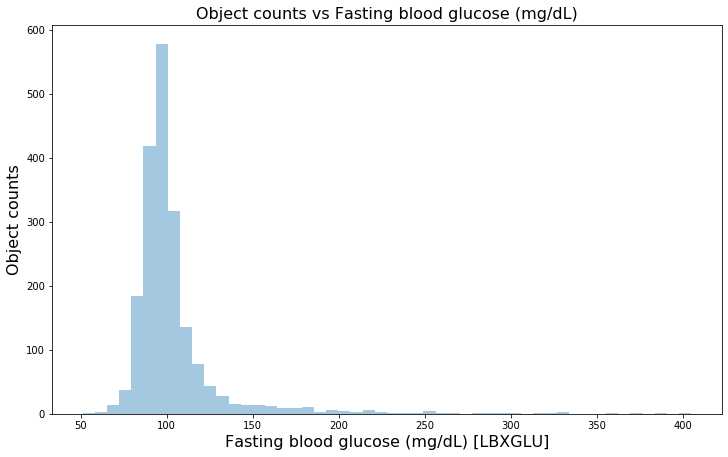

In [40]:
plt_title = "Object counts vs Fasting blood glucose (mg/dL)"
x_label = 'Fasting blood glucose (mg/dL) [LBXGLU]'
y_label = 'Object counts'
g1 = plt.figure(figsize=(12,8))   
g1 = sns.distplot(glu_df.LBXGLU,bins=50, kde=False, rug=False)
g1.set_title(plt_title,fontsize=16)
g1.set_xlabel(x_label,fontsize=16)
g1.set_ylabel(y_label,fontsize=16)
plt.subplots_adjust(top=0.8)
plt.show()

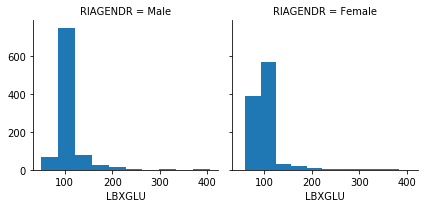

In [41]:
g = sns.FacetGrid(glu_df, col="RIAGENDR")
g.map(plt.hist, "LBXGLU")

The distribution of the fasting blood glucose data is plotted above. The mean fasting blood glucose is 104 mg/dL which is slight above the 100 mg/dL As shown in Figure 1, the distribution appears to be normal but with a long tail on the right. When grouped the data by gender, the male’s distribution shows a sharp peak at 100 mg/dL, while the female’s distribution has a shoulder on the left, indicating more females have normal blood glucose measurements than the males.

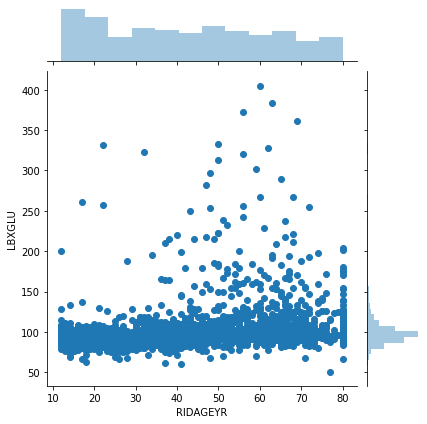

In [42]:
sns.jointplot(x="RIDAGEYR", y="LBXGLU",data=glu_df)

In [43]:
#list of mean fasting blood glucose values for different age groups
glu_df.groupby(['RIDAGEYR'])['LBXGLU'].mean().head(50)

RIDAGEYR
12     98.152174
13     95.658537
14     94.297872
15     92.609756
16     94.310345
17     96.243902
18     92.883333
19     92.288889
20     93.137931
21     93.342857
22    106.517241
23     93.393939
24     94.826087
25     90.935484
26     90.730769
27     93.375000
28     94.750000
29     93.884615
30     97.962963
31     95.379310
32    106.769231
33     96.757576
34    100.617647
35     97.826087
36     97.105263
37    100.727273
38    102.958333
39     95.409091
40     99.787879
41    100.935484
42    103.043478
43    104.914286
44    104.600000
45     98.000000
46    101.827586
47    108.687500
48    114.692308
49    108.500000
50    123.341463
51    109.909091
52    109.692308
53    103.772727
54    112.000000
55    111.689655
56    136.807692
57    105.133333
58    108.380952
59    109.692308
60    121.585366
61    112.363636
Name: LBXGLU, dtype: float64

The fasting blooding glucose values of different age groups are plotted, showing that 1) the participants are evenly distributed across all age groups with a slightly higher population under 20, and 2) all age groups appear to share a similar distribution of fasting blood glucose values, as most measurements are roughly around 100 mg/dL. The means of fasting bloog glucose above show that, as age increases, the mean of fasting blood glucose also increases. The inflection point is around age 40, as the means of fasting blood glucose appear to be above for those above 40 and up. 

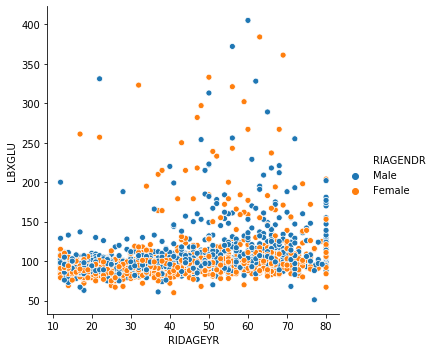

In [44]:
sns.relplot(x="RIDAGEYR", y="LBXGLU", hue="RIAGENDR",data=glu_df)

[Text(0, 0.5, 'Fasting blood glucose (mg/dL) [LBXGLU]'),
 Text(0.5, 0, 'Fasting blood glucose (mg/dL) [LBXGLU]'),
 Text(0.5, 1.0, 'Boxplot of fasting blood glucose grouped by age')]

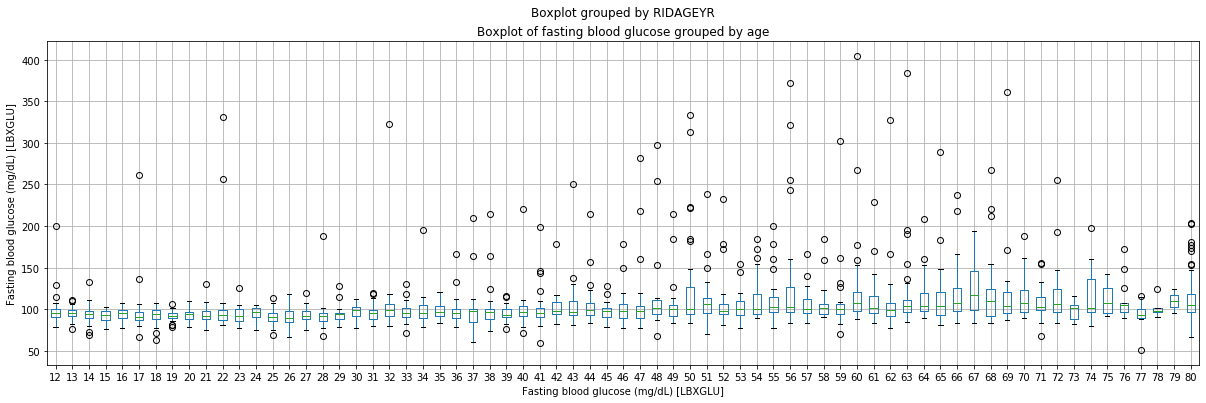

In [45]:
plt_title = "Boxplot of fasting blood glucose grouped by age"
y_label = 'Fasting blood glucose (mg/dL) [LBXGLU]'
X_label = 'Age'
ax = glu_df.boxplot('LBXGLU','RIDAGEYR',figsize=(20,6))
ax.set(title=plt_title, xlabel=x_label, ylabel =y_label)

In [46]:
# Selected key nutrients for EDA
plot_cols =[
    'High_Glu', #Label
    'LBXGLU', #N'Fasting_Glucose_(mg/dL)'
    'RIDAGEYR', #N'Age_in_years'
    'DR1TKCAL', #N'Energy_kcal'
    'DR1TPROT', #N'Protein_gm'
    'DR1TCARB', #N'Carbohydrate_gm'
    'DR1TSUGR', #N'Total_sugars_gm'
    'DR1TFIBE', #N'Dietary_fiber_gm'
    'DR1TTFAT', #N'Total_fat_gm'
]

In [47]:
num_df = glu_df[plot_cols].copy()

In [48]:
num_df = num_df.rename(columns={'High_Glu': "High blood glu (T/F)",
                                'LBXGLU':'Fasting glucose (mg/dL)',
                                'RIDAGEYR':'Age (years)',
                                'DR1TKCAL':'Energy (kcal)',
                                'DR1TPROT':'Protein (gm)',
                                'DR1TCARB':'Carbohydrate (gm)',
                                'DR1TSUGR':'Total sugars (gm)',
                                'DR1TFIBE':'Dietary fiber (gm)',
                                'DR1TTFAT':'Total fat (gm)'
                               })

In [49]:
num_df

,High blood glu (T/F),Fasting glucose (mg/dL),Age (years),Energy (kcal),Protein (gm),Carbohydrate (gm),Total sugars (gm),Dietary fiber (gm),Total fat (gm)
0,True,193.0,72,1743.0,64.61,224.39,102.90,9.9,65.97
1,False,89.0,26,3145.0,139.21,227.63,83.91,37.6,172.21
2,True,104.0,32,3194.0,144.92,385.05,158.45,33.4,121.74
3,True,103.0,38,2421.0,87.39,305.69,153.65,14.3,97.72
4,False,94.0,14,875.0,23.33,149.99,85.22,6.0,21.22
...,...,...,...,...,...,...,...,...,...
2068,True,111.0,80,2387.0,56.02,241.93,104.06,9.7,134.29
2069,False,98.0,18,1235.0,34.18,164.67,68.41,7.3,48.80
2070,True,100.0,38,625.0,28.43,98.34,55.82,6.6,13.98
2071,False,93.0,61,2728.0,66.13,374.03,226.38,10.9,112.40


/Users/siegfried/opt/anaconda3/envs/springboard/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/siegfried/opt/anaconda3/envs/springboard/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


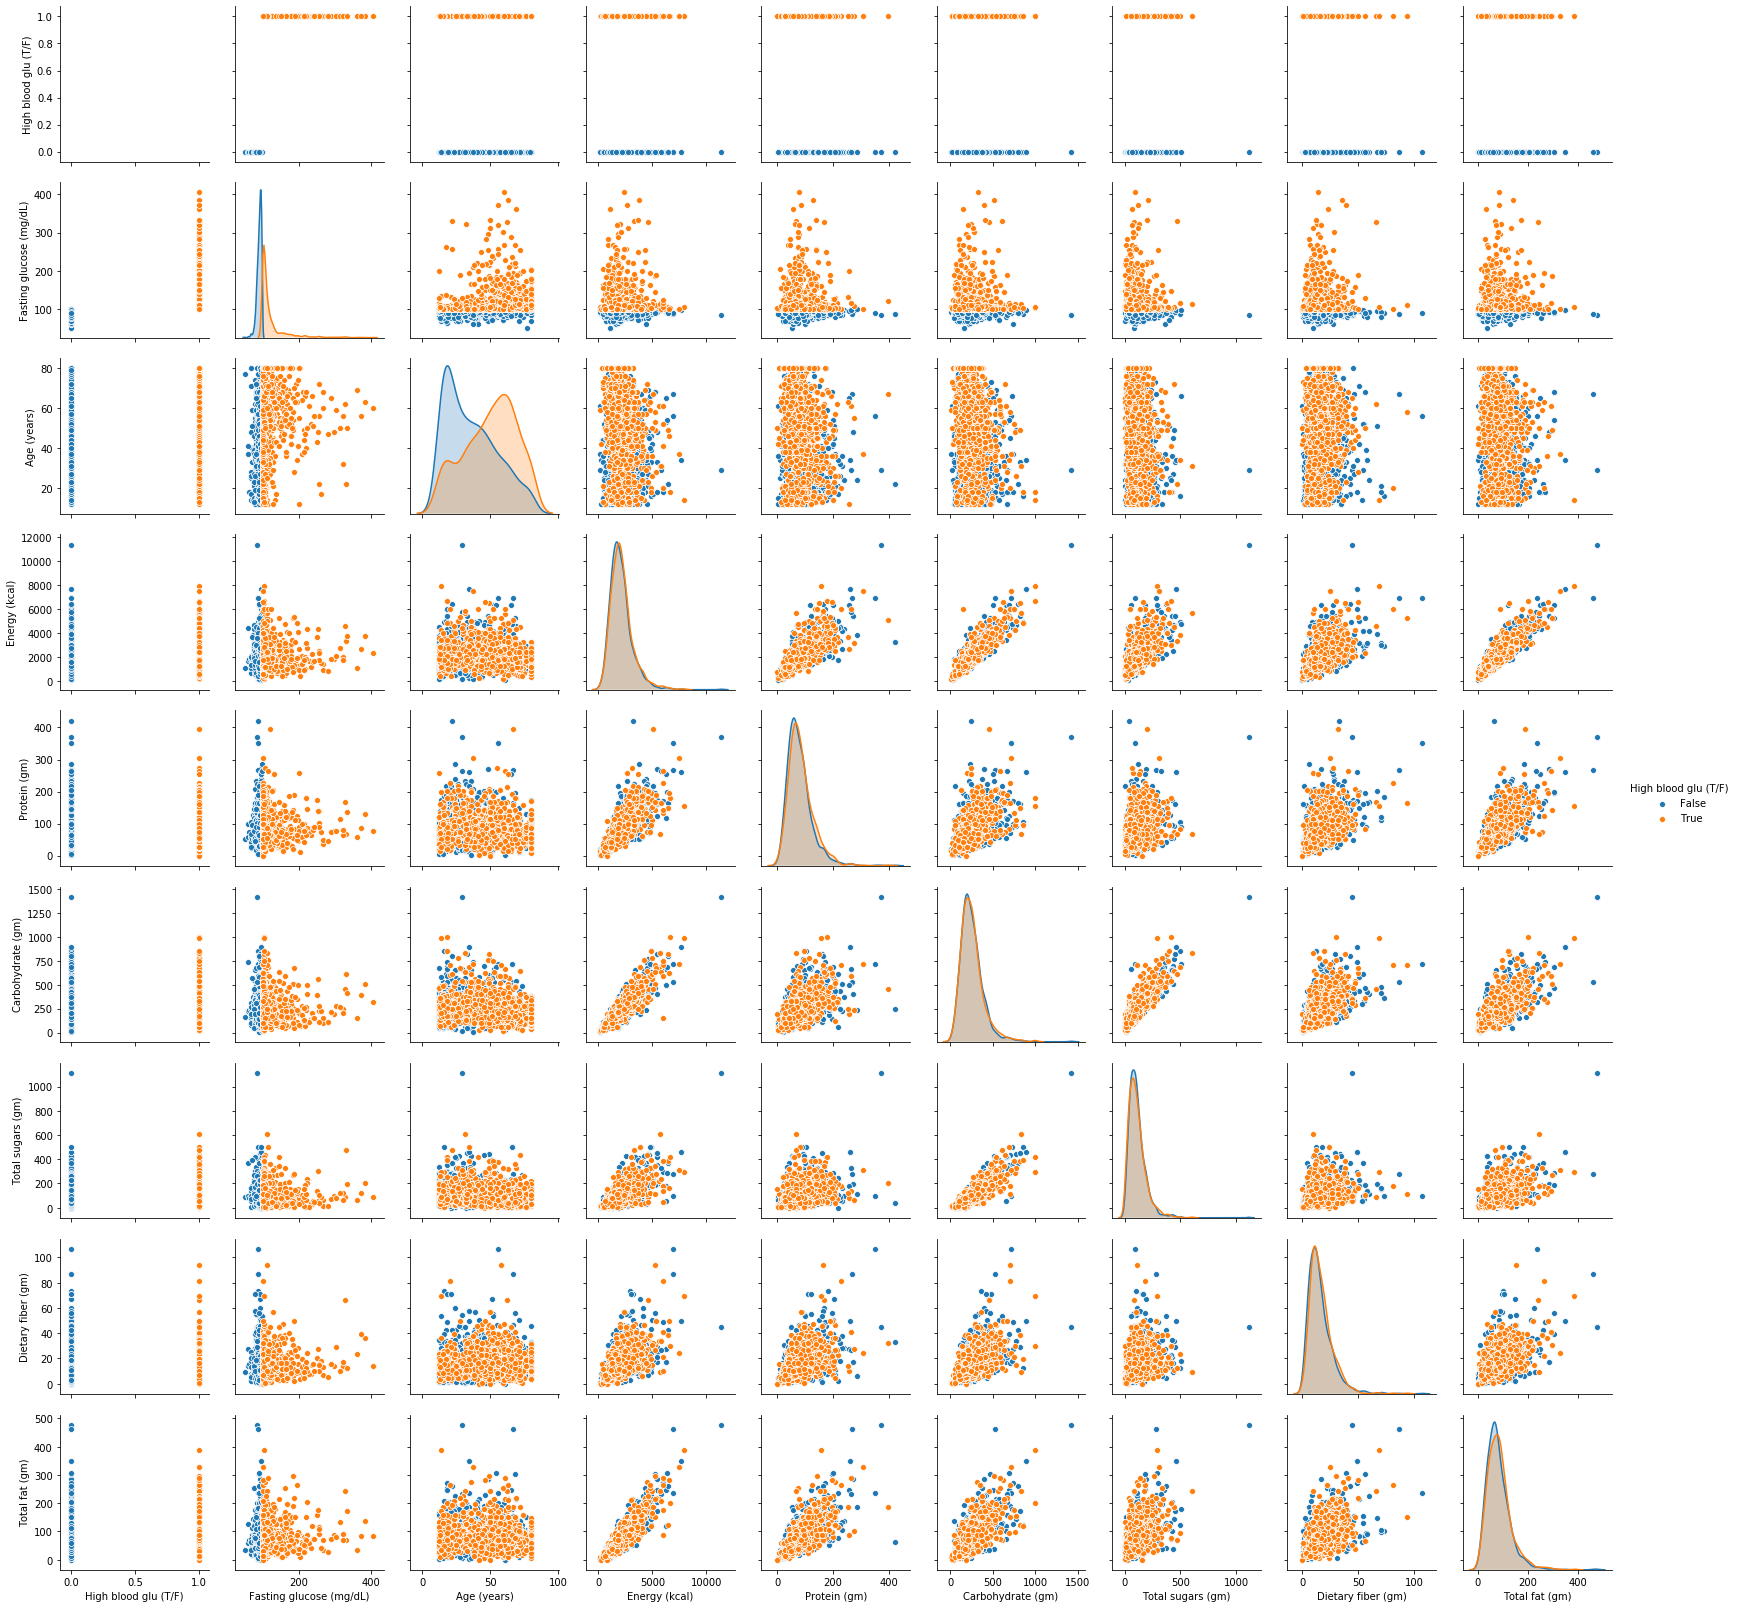

In [50]:
sns.pairplot(num_df,hue="High blood glu (T/F)")

To further examine the relationships between the selected features, the fasting blood glucose measurements and a selected subset of key features, including age, energy intake, and key nutrients consumed, including protein, carbohydrate, sugars and dietary fiber, are plotted against each other in Figure 5. The graph, as colored by the classification mentioned about based on the fasting blood glucose above 100 mg/dL or not, illustrate that there appear to be no clear relationships between most these features. The only exception appears to be age, in which the mean faster blood glucose measurement increases as age increases. 

## Prepare DF for modeling

In [51]:
#Numerical features
num_list =['RIDAGEYR', #N'Age_in_years'
           'DR1TKCAL', #N'Energy_kcal'
           'DR1TPROT', #N'Protein_gm'
           'DR1TCARB', #N'Carbohydrate_gm'
           'DR1TSUGR', #N'Total_sugars_gm'
           'DR1TFIBE', #N'Dietary_fiber_gm'
           'DR1TTFAT', #N'Total_fat_gm'
           'DR1TSFAT', #N'Total_saturated_fatty_acids_gm'
           'DR1TMFAT', #N'Total_monounsaturated_fatty_acids_gm'
           'DR1TPFAT', #N'Total_polyunsaturated_fatty_acids_gm'
           'DR1TCHOL', #N'Cholesterol_mg'
           'DR1TATOC', #N'Vitamin_E_as_alpha-tocopherol_mg'
           'DR1TATOA', #N'Added_alpha-tocopherol_Vitamin_E_mg'
           'DR1TRET', #N'Retinol_mcg'
           'DR1TVARA', #N'Vitamin_A,_RAE_mcg'
           'DR1TACAR', #N'Alpha-carotene_mcg'
           'DR1TBCAR', #N'Beta-carotene_mcg'
           'DR1TCRYP', #N'Beta-cryptoxanthin_mcg'
           'DR1TLYCO', #N'Lycopene_mcg'
           'DR1TLZ', #N'Lutein_+_zeaxanthin_mcg'
           'DR1TVB1', #N'Thiamin_Vitamin_B1_mg'
           'DR1TVB2', #N'Riboflavin_Vitamin_B2_mg'
           'DR1TNIAC', #N'Niacin_mg'
           'DR1TVB6', #N'Vitamin_B6_mg'
           'DR1TFOLA', #N'Total_folate_mcg'
           'DR1TFA', #N'Folic_acid_mcg'
           'DR1TFF', #N'Food_folate_mcg'
           'DR1TFDFE', #N'Folate_DFE_mcg'
           'DR1TCHL', #N'Total_choline_mg'
           'DR1TVB12', #N'Vitamin_B12_mcg'
           'DR1TB12A', #N'Added_vitamin_B12_mcg'
           'DR1TVC', #N'Vitamin_C_mg'
           'DR1TVD', #N'Vitamin_D_D2_+_D3_mcg'
           'DR1TVK', #N'Vitamin_K_mcg'
           'DR1TCALC', #N'Calcium_mg'
           'DR1TPHOS', #N'Phosphorus_mg'
           'DR1TMAGN', #N'Magnesium_mg'
           'DR1TIRON', #N'Iron_mg'
           'DR1TZINC', #N'Zinc_mg'
           'DR1TCOPP', #N'Copper_mg'
           'DR1TSODI', #N'Sodium_mg'
           'DR1TPOTA', #N'Potassium_mg'
           'DR1TSELE', #N'Selenium_mcg'
           'DR1TCAFF', #N'Caffeine_mg'
           'DR1TTHEO', #N'Theobromine_mg'
           'DR1TALCO', #N'Alcohol_gm'
           'DR1TMOIS', #N'Moisture_gm'
           'DR1BWATZ'  #N'Total_bottled_water_drank_yesterday_gm'
          ]

In [52]:
#Categorical features
cat_list = ['RIAGENDR', #'Gender'
            'DBQ095Z', #'Type_of_table_salt_used'
            'DBD100', #'How_often_add_salt_to_food_at_table'
            'DRQSPREP', #'Salt_used_in_preparation?'
            'DR1TWS' #'Tap_water_source'
           ]

In [53]:
features_Num = glu_df[['SEQN']+ num_list].copy()

In [54]:
features_Cat = glu_df[['SEQN']+ cat_list].copy()

In [55]:
def convert_cols_str(df,col_list):    
    for col in col_list:
        df[col] = df[col].astype(str)
    df2 = df.copy()
    return(df2)

In [56]:
features_Cat_dum_all = pd.get_dummies(features_Cat,cat_list)

In [57]:
features_Cat_dum_all

,SEQN,RIAGENDR_Female,RIAGENDR_Male,DBQ095Z_Lite salt,DBQ095Z_Ordinary salt,DBQ095Z_Salt substitute,DBD100_Occassionally,DBD100_Rarely,DBD100_Very often,DRQSPREP_Never,DRQSPREP_Occasionally,DRQSPREP_Rarely,DRQSPREP_Very often,DR1TWS_Community supply,DR1TWS_Don't drink tap water,DR1TWS_Spring,DR1TWS_Well or rain cistern
0,73559,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0
1,73568,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1
2,73577,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0
3,73580,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0
4,73587,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,83702,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0
2069,83707,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0
2070,83711,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0
2071,83712,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1


In [58]:
# Drop one of binary gender columns
features_Cat_dum = features_Cat_dum_all.drop(['RIAGENDR_Female'],axis=1)
df_features = pd.merge(features_Num, features_Cat_dum, on='SEQN', how='outer').copy()

In [59]:
df_features

,SEQN,RIDAGEYR,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TMFAT,...,DBD100_Rarely,DBD100_Very often,DRQSPREP_Never,DRQSPREP_Occasionally,DRQSPREP_Rarely,DRQSPREP_Very often,DR1TWS_Community supply,DR1TWS_Don't drink tap water,DR1TWS_Spring,DR1TWS_Well or rain cistern
0,73559,72,1743.0,64.61,224.39,102.90,9.9,65.97,25.263,20.902,...,1,0,0,0,1,0,1,0,0,0
1,73568,26,3145.0,139.21,227.63,83.91,37.6,172.21,66.642,57.929,...,0,0,0,1,0,0,0,0,0,1
2,73577,32,3194.0,144.92,385.05,158.45,33.4,121.74,48.486,42.117,...,0,0,0,0,0,1,1,0,0,0
3,73580,38,2421.0,87.39,305.69,153.65,14.3,97.72,26.584,37.877,...,1,0,0,0,0,1,1,0,0,0
4,73587,14,875.0,23.33,149.99,85.22,6.0,21.22,8.398,9.375,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1968,83702,80,2387.0,56.02,241.93,104.06,9.7,134.29,40.734,41.893,...,0,0,0,0,0,1,1,0,0,0
1969,83707,18,1235.0,34.18,164.67,68.41,7.3,48.80,15.338,16.567,...,0,1,0,1,0,0,1,0,0,0
1970,83711,38,625.0,28.43,98.34,55.82,6.6,13.98,4.495,5.372,...,1,0,0,0,1,0,1,0,0,0
1971,83712,61,2728.0,66.13,374.03,226.38,10.9,112.40,31.867,44.409,...,1,0,0,1,0,0,0,0,0,1


In [60]:
#IDs and labels
df_labels = glu_df[['SEQN','High_Glu']]

In [61]:
df_labels

,SEQN,High_Glu
0,73559,True
1,73568,False
2,73577,True
3,73580,True
4,73587,False
...,...,...
2068,83702,True
2069,83707,False
2070,83711,True
2071,83712,False


In [62]:
# Generate DF for modeling
model_df = pd.merge(df_labels,df_features, on='SEQN', how='inner').copy()

In [63]:
y = pd.Series.ravel(model_df[['High_Glu']])
X = model_df.drop(['SEQN','High_Glu'],axis=1)

In [64]:
X

,RIDAGEYR,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TMFAT,DR1TPFAT,...,DBD100_Rarely,DBD100_Very often,DRQSPREP_Never,DRQSPREP_Occasionally,DRQSPREP_Rarely,DRQSPREP_Very often,DR1TWS_Community supply,DR1TWS_Don't drink tap water,DR1TWS_Spring,DR1TWS_Well or rain cistern
0,72,1743.0,64.61,224.39,102.90,9.9,65.97,25.263,20.902,12.953,...,1,0,0,0,1,0,1,0,0,0
1,26,3145.0,139.21,227.63,83.91,37.6,172.21,66.642,57.929,32.571,...,0,0,0,1,0,0,0,0,0,1
2,32,3194.0,144.92,385.05,158.45,33.4,121.74,48.486,42.117,16.147,...,0,0,0,0,0,1,1,0,0,0
3,38,2421.0,87.39,305.69,153.65,14.3,97.72,26.584,37.877,25.078,...,1,0,0,0,0,1,1,0,0,0
4,14,875.0,23.33,149.99,85.22,6.0,21.22,8.398,9.375,3.911,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1968,80,2387.0,56.02,241.93,104.06,9.7,134.29,40.734,41.893,43.288,...,0,0,0,0,0,1,1,0,0,0
1969,18,1235.0,34.18,164.67,68.41,7.3,48.80,15.338,16.567,11.339,...,0,1,0,1,0,0,1,0,0,0
1970,38,625.0,28.43,98.34,55.82,6.6,13.98,4.495,5.372,2.371,...,1,0,0,0,1,0,1,0,0,0
1971,61,2728.0,66.13,374.03,226.38,10.9,112.40,31.867,44.409,29.531,...,1,0,0,1,0,0,0,0,0,1


## Import packages for modeling and define utility functions

In [65]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from collections import Counter
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, classification_report
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [66]:
random_seed = 12345

In [67]:
def print_pred_report(model,scoring_parameter,xtest,ytest,ypred):
    print("Predictions for test set:")
    print("{}: {:.3}".format(scoring_parameter, model.score(xtest, ytest)))
    print(classification_report(ytest, ypred))
    print('Confusion matrix:')
    confmat = confusion_matrix(ytest, ypred)
    print(confmat)

In [68]:
def print_ensemble_pred_report(model,xtest,ytest,ypred):
    print("Predictions for test set:")
    print("Accuracy: {:.3f}".format(model.score(xtest, ytest)))
    print("Recall: {:.3f}".format(recall_score(ytest, ypred)))
    print(classification_report(ytest, ypred))
    print('Confusion matrix:')
    confmat = confusion_matrix(ytest, ypred)
    print(confmat)

In [69]:
def print_nn_pred_report(ytest,ypred):
    print("Predictions for test set:")
    print(classification_report(ytest, ypred))
    print('Confusion matrix:')
    confmat = confusion_matrix(ytest, ypred)
    print(confmat)

### Random forest

In [70]:
#Define scoring and parameter grid for random forest
scoring_parameter_rf = 'recall'

param_dist = {'bootstrap': [True, False],
              "n_estimators": [50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250],
              "max_features": randint(1, 9),
              'max_depth': [20,30,40,50,60,70,80,90,100,110,120],
              "min_samples_leaf": randint(1, 9),
              "max_leaf_nodes": [10,6,2,None],
              "criterion": ["gini", "entropy"],
              "class_weight":["balanced", "balanced_subsample", None]
             }

In [71]:
# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=random_seed)

# Instantiate the RandomForestClassifier
rf = RandomForestClassifier(random_state=random_seed)

# Instantiate the RandomizedSearchCV object
rf_cv = RandomizedSearchCV(rf, param_dist, cv=9, scoring=scoring_parameter_rf, n_iter=20, n_jobs=5)

# Fit it to the data
rf_cv.fit(X_train,y_train)

# Print the tuned parameters and score
print("Tuned Random Forest Parameters: {}".format(rf_cv.best_params_))
print("Best score is {:.3}".format(rf_cv.best_score_))

# Predict test data
y_pred1 = rf_cv.predict(X_test)

# Prediction report for test data
print_pred_report(rf_cv,scoring_parameter_rf,X_test,y_test,y_pred1)

Tuned Random Forest Parameters: {'bootstrap': False, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 40, 'max_features': 4, 'max_leaf_nodes': 2, 'min_samples_leaf': 1, 'n_estimators': 220}
Best score is 0.654
Predictions for test set:
recall: 0.701
              precision    recall  f1-score   support

       False       0.72      0.53      0.61       231
        True       0.52      0.70      0.59       164

    accuracy                           0.60       395
   macro avg       0.62      0.62      0.60       395
weighted avg       0.63      0.60      0.60       395

Confusion matrix:
[[123 108]
 [ 49 115]]


### Examine important features

In [72]:
#save best model
rf1_best = rf_cv.best_estimator_
#check best n_neigbors value
print(rf_cv.best_params_)

{'bootstrap': False, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 40, 'max_features': 4, 'max_leaf_nodes': 2, 'min_samples_leaf': 1, 'n_estimators': 220}


In [73]:
feature_imp = pd.Series(rf1_best.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

DR1TPHOS                       0.072727
RIAGENDR_Male                  0.059091
DR1TMOIS                       0.059091
DR1TLZ                         0.054545
RIDAGEYR                       0.054545
                                 ...   
DR1TTHEO                       0.000000
DR1TFDFE                       0.000000
DR1TVB12                       0.000000
DR1TCALC                       0.000000
DR1TWS_Well or rain cistern    0.000000
Length: 63, dtype: float64

In [74]:
feature_imp_df = pd.DataFrame(feature_imp)

In [75]:
rf_imp = feature_imp_df.rename(columns = {0 : 'imp'})

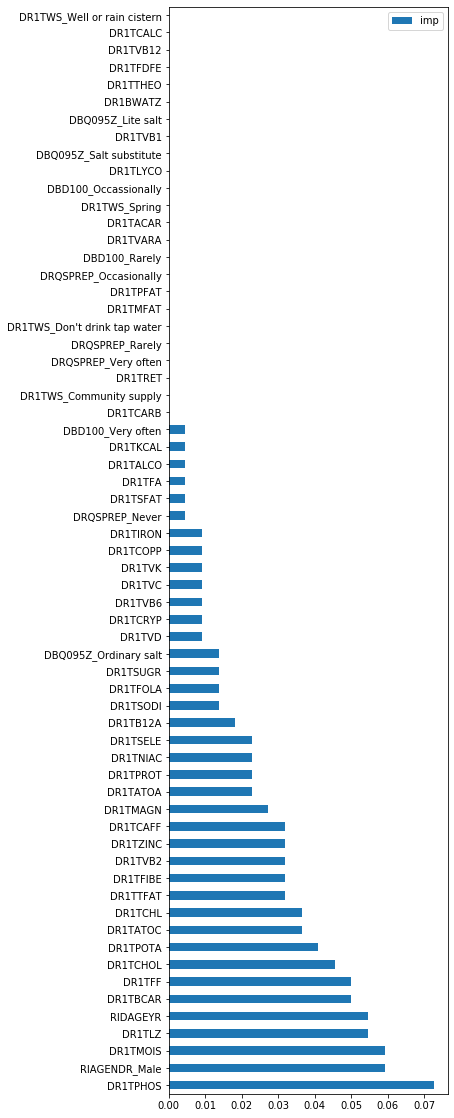

In [76]:
rf_imp.plot(kind='barh',figsize=(5,20))

In [77]:
rf_imp.iloc[0:20]

,imp
DR1TPHOS,0.072727
RIAGENDR_Male,0.059091
DR1TMOIS,0.059091
DR1TLZ,0.054545
RIDAGEYR,0.054545
DR1TBCAR,0.050000
DR1TFF,0.050000
DR1TCHOL,0.045455
DR1TPOTA,0.040909
DR1TATOC,0.036364


In [78]:
#rf_imp_cols = rf_imp[rf_imp.imp > 0.00].index.values.tolist()
rf_imp_cols = rf_imp.iloc[0:20].index.values.tolist()

In [79]:
#Generate df with only important features as seleted above
X2 = X[rf_imp_cols]

In [80]:
X2

,DR1TPHOS,RIAGENDR_Male,DR1TMOIS,DR1TLZ,RIDAGEYR,DR1TBCAR,DR1TFF,DR1TCHOL,DR1TPOTA,DR1TATOC,DR1TCHL,DR1TTFAT,DR1TFIBE,DR1TVB2,DR1TZINC,DR1TCAFF,DR1TMAGN,DR1TATOA,DR1TPROT,DR1TNIAC
0,1198.0,1,3766.70,300.0,72,449.0,133.0,88.0,1694.0,8.87,161.2,65.97,9.9,1.747,8.98,45.0,210.0,0.0,64.61,18.342
1,2361.0,0,6643.36,1447.0,26,5699.0,364.0,629.0,4307.0,17.45,658.1,172.21,37.6,2.915,20.51,199.0,604.0,0.0,139.21,23.003
2,2329.0,1,4676.28,246.0,32,377.0,332.0,361.0,2668.0,6.04,361.8,121.74,33.4,5.514,23.69,210.0,413.0,0.0,144.92,76.601
3,1231.0,0,2003.72,523.0,38,253.0,256.0,256.0,1792.0,6.98,248.6,97.72,14.3,1.268,14.34,36.0,334.0,0.0,87.39,21.680
4,481.0,1,1195.93,137.0,14,294.0,32.0,43.0,936.0,0.89,92.2,21.22,6.0,0.651,3.10,0.0,77.0,0.0,23.33,5.583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1968,1201.0,0,1362.97,771.0,80,579.0,250.0,379.0,1490.0,8.76,286.6,134.29,9.7,1.670,6.51,95.0,193.0,0.0,56.02,11.648
1969,621.0,1,1583.45,264.0,18,82.0,64.0,98.0,961.0,3.77,109.1,48.80,7.3,0.492,4.56,5.0,134.0,0.0,34.18,11.780
1970,472.0,0,769.22,446.0,38,2498.0,52.0,64.0,1135.0,1.59,120.8,13.98,6.6,1.174,11.18,0.0,92.0,0.0,28.43,12.883
1971,1354.0,1,1903.93,290.0,61,169.0,134.0,220.0,2177.0,5.74,274.5,112.40,10.9,2.007,11.30,160.0,307.0,0.0,66.13,16.420


In [95]:
# Create train and test sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y,test_size=0.2,stratify=y,random_state=random_seed)

# Instantiate the RandomForestClassifier
rf2 = RandomForestClassifier(random_state=random_seed)

# Instantiate the RandomizedSearchCV object
rf_cv2 = RandomizedSearchCV(rf2, param_dist, cv=9, scoring=scoring_parameter_rf, n_iter=20, n_jobs=5)

# Fit it to the data
rf_cv2.fit(X2_train,y2_train)

# Print the tuned parameters and score
print("Tuned Random Forest Parameters: {}".format(rf_cv2.best_params_))
print("Best score is {:.3}".format(rf_cv2.best_score_))

# Predict test data
y_pred2 = rf_cv2.predict(X2_test)

# Prediction report for test data
print_pred_report(rf_cv2,scoring_parameter_rf,X2_test,y2_test,y_pred2)

Tuned Random Forest Parameters: {'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 120, 'max_features': 4, 'max_leaf_nodes': 6, 'min_samples_leaf': 4, 'n_estimators': 220}
Best score is 0.673
Predictions for test set:
recall: 0.72
              precision    recall  f1-score   support

       False       0.75      0.61      0.67       231
        True       0.56      0.72      0.63       164

    accuracy                           0.65       395
   macro avg       0.66      0.66      0.65       395
weighted avg       0.67      0.65      0.66       395

Confusion matrix:
[[140  91]
 [ 46 118]]


### Try scaled numerical features

In [96]:
#Scale with MinMaxScaler (0,1)
scaler = MinMaxScaler(feature_range = (0, 1))
#scale numerical features in X and save as a new df
scaled_num_features = pd.DataFrame(scaler.fit_transform(X[num_list]),columns=num_list,index= X.index)

In [97]:
X_scaled = X.copy()
for col in num_list:
    X_scaled[col] = scaled_num_features[col]

In [98]:
X_scaled

,RIDAGEYR,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TMFAT,DR1TPFAT,...,DBD100_Rarely,DBD100_Very often,DRQSPREP_Never,DRQSPREP_Occasionally,DRQSPREP_Rarely,DRQSPREP_Very often,DR1TWS_Community supply,DR1TWS_Don't drink tap water,DR1TWS_Spring,DR1TWS_Well or rain cistern
0,0.882353,0.144610,0.153235,0.152431,0.092140,0.092523,0.137966,0.160622,0.094292,0.091339,...,1,0,0,0,1,0,1,0,0,0
1,0.205882,0.269299,0.330163,0.154720,0.075114,0.351402,0.360151,0.423710,0.261326,0.229676,...,0,0,0,1,0,0,0,0,0,1
2,0.294118,0.273657,0.343706,0.265955,0.141944,0.312150,0.254601,0.308274,0.189996,0.113861,...,0,0,0,0,0,1,1,0,0,0
3,0.382353,0.204909,0.207262,0.209878,0.137640,0.133645,0.204367,0.169021,0.170869,0.176839,...,1,0,0,0,0,1,1,0,0,0
4,0.029412,0.067414,0.055332,0.099859,0.076289,0.056075,0.044378,0.053395,0.042292,0.027579,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1968,1.000000,0.201885,0.132862,0.164825,0.093180,0.090654,0.280847,0.258987,0.188986,0.305247,...,0,0,0,0,0,1,1,0,0,0
1969,0.088235,0.099431,0.081064,0.110232,0.061217,0.068224,0.102058,0.097519,0.074736,0.079957,...,0,1,0,1,0,0,1,0,0,0
1970,0.382353,0.045180,0.067427,0.063362,0.049930,0.061682,0.029237,0.028579,0.024234,0.016719,...,1,0,0,0,1,0,1,0,0,0
1971,0.720588,0.232213,0.156840,0.258168,0.202847,0.101869,0.235068,0.202611,0.200336,0.208239,...,1,0,0,1,0,0,0,0,0,1


In [105]:
# Create train and test sets
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled,y,test_size=0.2,stratify=y,random_state=random_seed)

# Instantiate the RandomForestClassifier
rf3 = RandomForestClassifier(random_state=random_seed)

# Instantiate the RandomizedSearchCV object
rf_cv3 = RandomizedSearchCV(rf3, param_dist, cv=9, scoring=scoring_parameter_rf, n_iter=20, n_jobs=5)

# Fit it to the data
rf_cv3.fit(X_train_scaled,y_train_scaled)

# Print the tuned parameters and score
print("Tuned Random Forest Parameters: {}".format(rf_cv3.best_params_))
print("Best score is {:.3}".format(rf_cv3.best_score_))

# Predict test data
y_pred3 = rf_cv3.predict(X_test_scaled)

# Prediction report for test data
print_pred_report(rf_cv3,scoring_parameter_rf,X_test_scaled,y_test_scaled,y_pred3)

Tuned Random Forest Parameters: {'bootstrap': True, 'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': 60, 'max_features': 4, 'max_leaf_nodes': 2, 'min_samples_leaf': 6, 'n_estimators': 200}
Best score is 0.647
Predictions for test set:
recall: 0.707
              precision    recall  f1-score   support

       False       0.72      0.53      0.61       231
        True       0.52      0.71      0.60       164

    accuracy                           0.60       395
   macro avg       0.62      0.62      0.60       395
weighted avg       0.63      0.60      0.60       395

Confusion matrix:
[[122 109]
 [ 48 116]]


### Look at important features

In [106]:
#save best model
rf3_best = rf_cv3.best_estimator_
print(rf_cv3.best_params_)

{'bootstrap': True, 'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': 60, 'max_features': 4, 'max_leaf_nodes': 2, 'min_samples_leaf': 6, 'n_estimators': 200}


In [107]:
feature_imp2 = pd.Series(rf3_best.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp2

RIDAGEYR                       0.060
RIAGENDR_Male                  0.055
DR1TFF                         0.045
DR1TPHOS                       0.040
DR1TPOTA                       0.035
                               ...  
DR1TLYCO                       0.000
DR1TVB1                        0.000
DBQ095Z_Ordinary salt          0.000
DR1BWATZ                       0.000
DR1TWS_Well or rain cistern    0.000
Length: 63, dtype: float64

In [108]:
feature_imp_df2 = pd.DataFrame(feature_imp2)

In [109]:
rf_imp2 = feature_imp_df2.rename(columns = {0 : 'imp'})

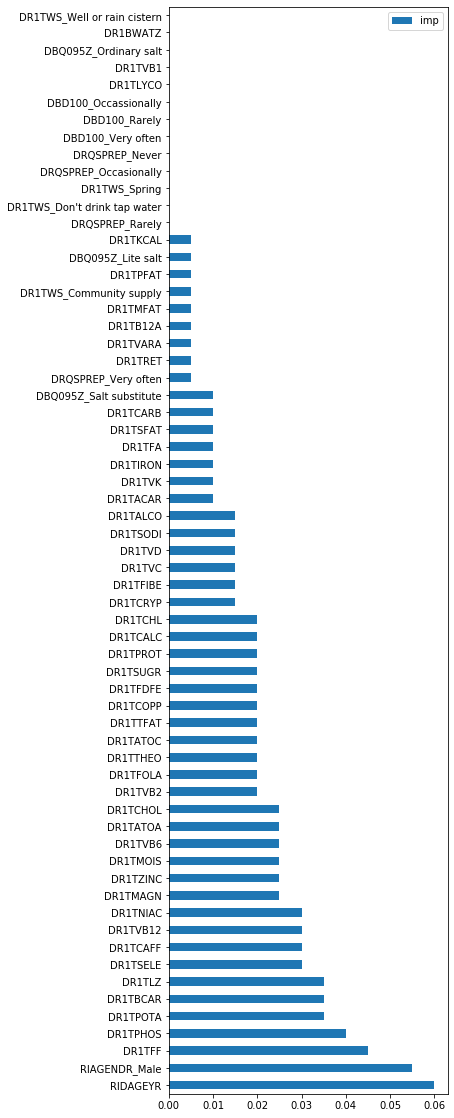

In [110]:
rf_imp2.plot(kind='barh',figsize=(5,20))

In [111]:
#rf_imp_cols2 = rf_imp2[rf_imp2.imp > 0.00].index.values.tolist()
rf_imp_cols2 = rf_imp2.iloc[0:20].index.values.tolist()

In [112]:
rf_imp_cols2

['RIDAGEYR',
 'RIAGENDR_Male',
 'DR1TFF',
 'DR1TPHOS',
 'DR1TPOTA',
 'DR1TBCAR',
 'DR1TLZ',
 'DR1TSELE',
 'DR1TCAFF',
 'DR1TVB12',
 'DR1TNIAC',
 'DR1TMAGN',
 'DR1TZINC',
 'DR1TMOIS',
 'DR1TVB6',
 'DR1TATOA',
 'DR1TCHOL',
 'DR1TVB2',
 'DR1TFOLA',
 'DR1TTHEO']

In [113]:
#Refine X_scaled wtih import features selected above
X3 = X_scaled[rf_imp_cols2]

In [114]:
# Create train and test sets
X3_train, X3_test, y3_train, y3_test = train_test_split(X3,y,test_size=0.2,stratify=y,random_state=random_seed)

# Instantiate the RandomForestClassifier
rf4 = RandomForestClassifier(random_state=random_seed)

# Instantiate the RandomizedSearchCV object
rf_cv4 = RandomizedSearchCV(rf4, param_dist, cv=9, scoring=scoring_parameter_rf,n_iter=20,n_jobs=5)

# Fit it to the data
rf_cv4.fit(X3_train,y3_train)

# Print the tuned parameters and score
print("Tuned Random Forest Parameters: {}".format(rf_cv4.best_params_))
print("Best score is {}".format(rf_cv4.best_score_))

# Predict test data
y_pred4 = rf_cv4.predict(X3_test)

# Prediction report for test data
print_pred_report(rf_cv4,scoring_parameter_rf,X3_test,y3_test,y_pred4)

Tuned Random Forest Parameters: {'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 110, 'max_features': 6, 'max_leaf_nodes': 6, 'min_samples_leaf': 1, 'n_estimators': 200}
Best score is 0.670450701843396
Predictions for test set:
recall: 0.744
              precision    recall  f1-score   support

       False       0.77      0.61      0.68       231
        True       0.57      0.74      0.65       164

    accuracy                           0.66       395
   macro avg       0.67      0.67      0.66       395
weighted avg       0.69      0.66      0.67       395

Confusion matrix:
[[140  91]
 [ 42 122]]


### Random undersampling

In [115]:
print(Counter(y_train))

Counter({False: 923, True: 655})


In [116]:
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

In [117]:
# fit and apply the transform
X_train_scaled_under, y_train_scaled_under = undersample.fit_resample(X_train_scaled, y_train_scaled)

In [118]:
print(Counter(y_train_scaled_under))

Counter({False: 655, True: 655})


In [119]:
# Instantiate the RandomForestClassifier
rf5 = RandomForestClassifier(random_state=random_seed)

# Instantiate the RandomizedSearchCV object
rf_cv5 = RandomizedSearchCV(rf5, param_dist, cv=9, scoring=scoring_parameter_rf,n_iter=20,n_jobs=5)

# Fit it to the data
rf_cv5.fit(X_train_scaled_under,y_train_scaled_under)

# Print the tuned parameters and score
print("Tuned Random Forest Parameters: {}".format(rf_cv5.best_params_))
print("Best score is {:.3f}".format(rf_cv5.best_score_))

# Predict test data
y_pred5 = rf_cv5.predict(X_test_scaled)

# Prediction report for test data
print_pred_report(rf_cv5,scoring_parameter_rf,X_test_scaled,y_test_scaled,y_pred5)

Tuned Random Forest Parameters: {'bootstrap': True, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 90, 'max_features': 1, 'max_leaf_nodes': 2, 'min_samples_leaf': 7, 'n_estimators': 240}
Best score is 0.744
Predictions for test set:
recall: 0.75
              precision    recall  f1-score   support

       False       0.70      0.41      0.52       231
        True       0.47      0.75      0.58       164

    accuracy                           0.55       395
   macro avg       0.59      0.58      0.55       395
weighted avg       0.61      0.55      0.54       395

Confusion matrix:
[[ 95 136]
 [ 41 123]]


In [120]:
#save best model
rf5_best = rf_cv5.best_estimator_
print(rf_cv5.best_params_)

{'bootstrap': True, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 90, 'max_features': 1, 'max_leaf_nodes': 2, 'min_samples_leaf': 7, 'n_estimators': 240}


In [121]:
feature_imp_rfu = pd.Series(rf5_best.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp_rfu

DR1TCHOL                        0.037500
DR1TWS_Don't drink tap water    0.033333
DR1TCARB                        0.033333
DR1TCRYP                        0.033333
DR1TALCO                        0.033333
                                  ...   
DR1TFA                          0.004167
DR1TFF                          0.004167
DR1TCOPP                        0.004167
DRQSPREP_Occasionally           0.000000
DR1TZINC                        0.000000
Length: 63, dtype: float64

In [122]:
feature_imp_df3 = pd.DataFrame(feature_imp_rfu)

In [123]:
rf_imp3 = feature_imp_df3.rename(columns = {0 : 'imp'})

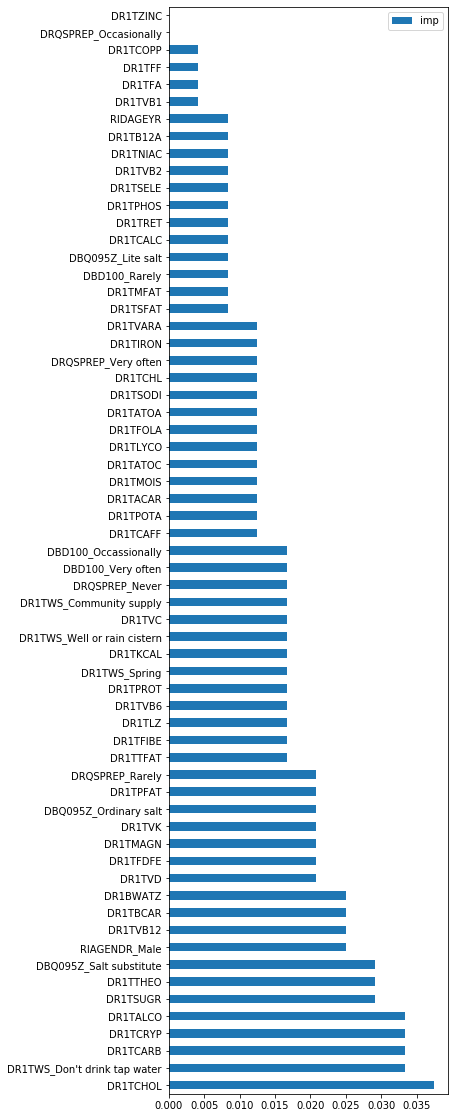

In [124]:
rf_imp3.plot(kind='barh',figsize=(5,20))

### Random oversampling

In [125]:
print(Counter(y_train))

Counter({False: 923, True: 655})


In [126]:
# define undersample strategy
oversample = RandomOverSampler(sampling_strategy='minority')

In [127]:
# fit and apply the transform
X_train_scaled_over, y_train_scaled_over = oversample.fit_resample(X_train_scaled, y_train_scaled)

In [128]:
print(Counter(y_train_scaled_over))

Counter({False: 923, True: 923})


In [129]:
# Instantiate the RandomForestClassifier
rf6 = RandomForestClassifier(random_state=random_seed)

# Instantiate the RandomizedSearchCV object
rf_cv6 = RandomizedSearchCV(rf6, param_dist, cv=9, scoring=scoring_parameter_rf,n_iter=20,n_jobs=5)

# Fit it to the data
rf_cv6.fit(X_train_scaled_over,y_train_scaled_over)

# Print the tuned parameters and score
print("Tuned Random Forest Parameters: {}".format(rf_cv6.best_params_))
print("Best score is {:.3f}".format(rf_cv6.best_score_))

# Predict test data
y_pred6 = rf_cv6.predict(X_test_scaled)

# Prediction report for test data
print_pred_report(rf_cv6,scoring_parameter_rf,X_test_scaled,y_test_scaled,y_pred6)

Tuned Random Forest Parameters: {'bootstrap': False, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 100, 'max_features': 4, 'max_leaf_nodes': None, 'min_samples_leaf': 5, 'n_estimators': 250}
Best score is 0.741
Predictions for test set:
recall: 0.463
              precision    recall  f1-score   support

       False       0.67      0.77      0.72       231
        True       0.59      0.46      0.52       164

    accuracy                           0.65       395
   macro avg       0.63      0.62      0.62       395
weighted avg       0.64      0.65      0.64       395

Confusion matrix:
[[179  52]
 [ 88  76]]


In [130]:
#save best model
rf6_best = rf_cv6.best_estimator_
print(rf_cv6.best_params_)

{'bootstrap': False, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 100, 'max_features': 4, 'max_leaf_nodes': None, 'min_samples_leaf': 5, 'n_estimators': 250}


In [131]:
feature_imp_rfo = pd.Series(rf6_best.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp_rfo

RIDAGEYR                       0.092612
DR1TVB2                        0.023488
DR1TLZ                         0.022729
DR1TMOIS                       0.022154
DR1TPOTA                       0.021929
                                 ...   
DBQ095Z_Lite salt              0.000764
DRQSPREP_Never                 0.000750
DR1TWS_Well or rain cistern    0.000593
DBQ095Z_Salt substitute        0.000486
DR1TWS_Spring                  0.000311
Length: 63, dtype: float64

In [132]:
feature_imp_df4 = pd.DataFrame(feature_imp_rfo)

In [133]:
rf_imp4 = feature_imp_df4.rename(columns = {0 : 'imp'})

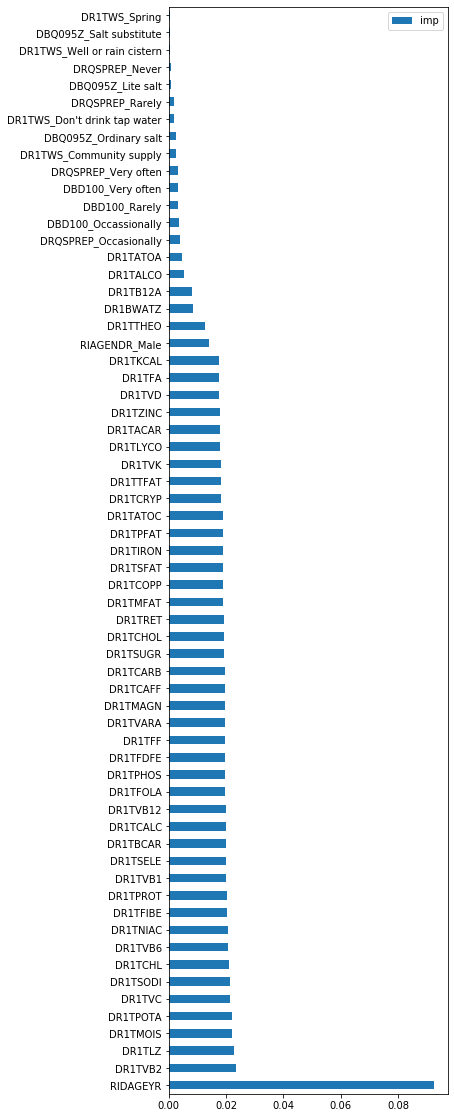

In [134]:
rf_imp4.plot(kind='barh',figsize=(5,20))

In [135]:
#save best model
rf_best = rf_cv5.best_estimator_
print(rf_cv5.best_params_)

{'bootstrap': True, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 90, 'max_features': 1, 'max_leaf_nodes': 2, 'min_samples_leaf': 7, 'n_estimators': 240}


## Logistic regression

In [136]:
#Instantiate the logistic regression classifier
#logreg = LogisticRegression()
#rfe = RFE(logreg, n_features_to_select=30)
#rfe = rfe.fit(X_train_scaled, y_train_scaled)

In [137]:
#Define scoring and parameter grid for logistic regression model
scoring_parameter_lr = 'recall'
param_dist_lr = {"C":np.logspace(-3,3,7),
                 "penalty":['l2','elasticnet','none']
                }

#Instantiate the logistic regression classifier
logreg = LogisticRegression()

#Instantiate the RandomizedSearchCV object
logreg_cv=RandomizedSearchCV(logreg,param_dist_lr,cv=9,scoring=scoring_parameter_lr, n_iter=50, n_jobs=5)

#Fit training data
logreg_cv.fit(X_train_scaled,y_train_scaled)

/Users/siegfried/opt/anaconda3/envs/springboard/lib/python3.7/site-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 21 is smaller than n_iter=50. Running 21 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=9, estimator=LogisticRegression(), n_iter=50, n_jobs=5,
                   param_distributions={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                                        'penalty': ['l2', 'elasticnet',
                                                    'none']},
                   scoring='recall')

In [138]:
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {:.3f}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'penalty': 'l2', 'C': 1.0}
Best score is 0.505


In [139]:
# Predict test data
y_pred_lr = logreg_cv.predict(X_test_scaled)

# Prediction report for test data
print_pred_report(logreg_cv,scoring_parameter_lr,X_test_scaled,y_test_scaled,y_pred_lr)

Predictions for test set:
recall: 0.567
              precision    recall  f1-score   support

       False       0.71      0.75      0.73       231
        True       0.62      0.57      0.59       164

    accuracy                           0.68       395
   macro avg       0.67      0.66      0.66       395
weighted avg       0.67      0.68      0.67       395

Confusion matrix:
[[174  57]
 [ 71  93]]


In [140]:
#save best model
logreg_best = logreg_cv.best_estimator_
print(logreg_cv.best_params_)

{'penalty': 'l2', 'C': 1.0}


## SVM

In [141]:
#Define scoring and parameter grid for SVM model
scoring_parameter_svm ='recall'
param_dist_svm = {'C': [0.1,1, 10, 100], 
                  'degree': [1,2,3,4,5],
                  'gamma': ['scale','auto'],
                  'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
                  'class_weight': [None, 'balanced']
                 }

# Instantiate SVM
svm = SVC(probability = True)

# Instantiate the RandomizedSearchCV object
svm_cv = RandomizedSearchCV(svm, param_dist_svm, cv=9, scoring=scoring_parameter_svm, n_iter=20,n_jobs=5)

# Fit it to the data
svm_cv.fit(X_train_scaled, y_train_scaled)

# Print the tuned parameters and score
print("Tuned SVM Parameters: {}".format(svm_cv.best_params_))
print("Best score is {:.3f}".format(svm_cv.best_score_))

Tuned SVM Parameters: {'kernel': 'rbf', 'gamma': 'scale', 'degree': 1, 'class_weight': 'balanced', 'C': 0.1}
Best score is 0.678


In [142]:
# Predict test data
y_pred_svm = svm_cv.predict(X_test_scaled)

# Prediction report for test data
print_pred_report(svm_cv,scoring_parameter_svm,X_test_scaled,y_test_scaled,y_pred_svm)

Predictions for test set:
recall: 0.787
              precision    recall  f1-score   support

       False       0.78      0.52      0.63       231
        True       0.54      0.79      0.64       164

    accuracy                           0.63       395
   macro avg       0.66      0.66      0.63       395
weighted avg       0.68      0.63      0.63       395

Confusion matrix:
[[121 110]
 [ 35 129]]


In [143]:
#save best model
svm_best = svm_cv.best_estimator_
print(svm_cv.best_params_)

{'kernel': 'rbf', 'gamma': 'scale', 'degree': 1, 'class_weight': 'balanced', 'C': 0.1}


### KNN

In [144]:
#Define scoring and parameter grid for KNN model
scoring_parameter_knn ='recall'
param_dist_knn = {'n_neighbors': np.arange(1, 25)}

# Instantiate the KNN classifier
knn = KNeighborsClassifier()

# Instantiate the RandomizedSearchCV object
knn_cv = RandomizedSearchCV(knn, param_dist_knn, cv=9, scoring=scoring_parameter_knn,n_iter=20,n_jobs=5)

# Fit it to the data
knn_cv.fit(X_train_scaled, y_train_scaled)

# Print the tuned parameters and score
print("Tuned KNN Parameters: {}".format(knn_cv.best_params_))
print("Best score is {:.3f}".format(knn_cv.best_score_))

Tuned KNN Parameters: {'n_neighbors': 3}
Best score is 0.499


In [145]:
# Predict test data
y_pred_knn = knn_cv.predict(X_test_scaled)

# Prediction report for test data
print_pred_report(knn_cv,scoring_parameter_knn,X_test_scaled,y_test_scaled,y_pred_knn)

Predictions for test set:
recall: 0.463
              precision    recall  f1-score   support

       False       0.62      0.61      0.62       231
        True       0.46      0.46      0.46       164

    accuracy                           0.55       395
   macro avg       0.54      0.54      0.54       395
weighted avg       0.55      0.55      0.55       395

Confusion matrix:
[[142  89]
 [ 88  76]]


In [146]:
#save best model
knn_best = knn_cv.best_estimator_
print(knn_cv.best_params_)

{'n_neighbors': 3}


### Adaboost

In [147]:
#Define scoring and parameter grid for Adaboost model
scoring_parameter_ada ='recall'
param_dist_ada = {
    'n_estimators': [30,40,50,60,70,80,90,100],
    'learning_rate' : [0.001,0.01,0.1,1],
    'algorithm' : ['SAMME', 'SAMME.R']
}

# Instantiate the AdaBoost classifier
ada = AdaBoostClassifier(random_state=random_seed)

# Instantiate the RandomizedSearchCV object
ada_cv = RandomizedSearchCV(ada, param_dist_ada, cv=9, scoring=scoring_parameter_ada,n_iter=20,n_jobs=5)

# Fit it to the data
ada_cv.fit(X_train_scaled, y_train_scaled)

# Print the tuned parameters and score
print("Tuned AdaBoost Parameters: {}".format(ada_cv.best_params_))
print("Best score is {:.3f}".format(ada_cv.best_score_))

Tuned AdaBoost Parameters: {'n_estimators': 40, 'learning_rate': 0.01, 'algorithm': 'SAMME'}
Best score is 0.629


In [148]:
# Predict test data
y_pred_ada = ada_cv.predict(X_test_scaled)

# Prediction report for test data
print_pred_report(ada_cv,scoring_parameter_ada,X_test_scaled,y_test_scaled,y_pred_ada)

Predictions for test set:
recall: 0.701
              precision    recall  f1-score   support

       False       0.74      0.61      0.67       231
        True       0.56      0.70      0.62       164

    accuracy                           0.65       395
   macro avg       0.65      0.66      0.65       395
weighted avg       0.67      0.65      0.65       395

Confusion matrix:
[[142  89]
 [ 49 115]]


In [149]:
#save best model
ada_best = ada_cv.best_estimator_
print(ada_cv.best_params_)

{'n_estimators': 40, 'learning_rate': 0.01, 'algorithm': 'SAMME'}


### Gradient tree boosting

In [150]:
#Define scoring and parameter grid for GTB model
scoring_parameter_gtb ='recall'
param_dist_gtb = {
    'loss': ['deviance', 'exponential'],
    'learning_rate' : [0.01,0.05,0.1,0.3,0.5,1],
    'n_estimators': [30,40,50,60,70,80,90,100],
    'subsample': [0.01, 0.1, 0.5, 1.0],
    'criterion': ['friedman_mse','mse','mae'],
    'max_depth': np.arange(1, 10),
    'max_features': ['auto','sqrt','log2']
}

# Instantiate the GTB classifier
gtb = GradientBoostingClassifier(random_state=random_seed)

# Instantiate the RandomizedSearchCV object
gtb_cv = RandomizedSearchCV(gtb, param_dist_gtb, cv=9, scoring=scoring_parameter_gtb,n_iter=20,n_jobs=5)

# Fit it to the data
gtb_cv.fit(X_train_scaled, y_train_scaled)

# Print the tuned parameters and score
print("Tuned Gradient Tree Boosting Parameters: {}".format(gtb_cv.best_params_))
print("Best score is {:.3f}".format(gtb_cv.best_score_))

Tuned Gradient Tree Boosting Parameters: {'subsample': 0.01, 'n_estimators': 70, 'max_features': 'auto', 'max_depth': 9, 'loss': 'deviance', 'learning_rate': 1, 'criterion': 'friedman_mse'}
Best score is 0.549


In [151]:
# Predict test data
y_pred_gtb = gtb_cv.predict(X_test_scaled)

# Prediction report for test data
print_pred_report(gtb_cv,scoring_parameter_gtb,X_test_scaled,y_test_scaled,y_pred_gtb)

Predictions for test set:
recall: 0.884
              precision    recall  f1-score   support

       False       0.53      0.09      0.15       231
        True       0.41      0.88      0.56       164

    accuracy                           0.42       395
   macro avg       0.47      0.49      0.36       395
weighted avg       0.48      0.42      0.32       395

Confusion matrix:
[[ 21 210]
 [ 19 145]]


In [152]:
#save best model
gtb_best = gtb_cv.best_estimator_
print(gtb_cv.best_params_)

{'subsample': 0.01, 'n_estimators': 70, 'max_features': 'auto', 'max_depth': 9, 'loss': 'deviance', 'learning_rate': 1, 'criterion': 'friedman_mse'}


### Examine important features from key models

In [153]:
#feature importance calculated from GTB
feature_imp_gtb = pd.Series(gtb_best.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp_gtb

DR1TLYCO                        0.063973
DR1TCRYP                        0.060460
DR1TRET                         0.046938
RIDAGEYR                        0.040969
DR1TPROT                        0.039336
                                  ...   
DR1TWS_Spring                   0.000000
DR1TWS_Community supply         0.000000
DBQ095Z_Salt substitute         0.000000
DR1TWS_Don't drink tap water    0.000000
DR1TPFAT                        0.000000
Length: 63, dtype: float64

In [154]:
#feature importance from other models; create new dataframe to show importance of each feature
#Original baseline rf
rf1_featimp = pd.DataFrame(feature_imp)
rf1_featimp = rf1_featimp.reset_index().rename(columns={'index':'feat',0: "rf1_feat_imp"}).copy()

In [155]:
#rf with scaled numerical values
rf3_featimp = pd.DataFrame(feature_imp2)
rf3_featimp = rf3_featimp.reset_index().rename(columns={'index':'feat',0: "rf3_feat_imp"}).copy()

In [156]:
#rf with undersampling (best recall for test set)
rf5_featimp = pd.DataFrame(feature_imp_rfu)
rf5_featimp = rf5_featimp.reset_index().rename(columns={'index':'feat',0: "rf5_feat_imp"}).copy()

In [157]:
#gtb
gtb_featimp = pd.DataFrame(feature_imp_gtb)
gtb_featimp = gtb_featimp.reset_index().rename(columns={'index':'feat',0: "gtb_feat_imp"}).copy()

In [158]:
featimp_sum = pd.merge(rf1_featimp, rf3_featimp, how='outer',on='feat').copy()
featimp_sum = featimp_sum.merge(rf5_featimp, how='outer',on='feat').copy()
featimp_sum = featimp_sum.merge(gtb_featimp, how='outer',on='feat').copy()

In [159]:
featimp_sum

,feat,rf1_feat_imp,rf3_feat_imp,rf5_feat_imp,gtb_feat_imp
0,DR1TPHOS,0.072727,0.040,0.008333,0.029039
1,RIAGENDR_Male,0.059091,0.055,0.025000,0.017087
2,DR1TMOIS,0.059091,0.025,0.012500,0.031906
3,DR1TLZ,0.054545,0.035,0.016667,0.029300
4,RIDAGEYR,0.054545,0.060,0.008333,0.040969
...,...,...,...,...,...
58,DR1TTHEO,0.000000,0.020,0.029167,0.015552
59,DR1TFDFE,0.000000,0.020,0.020833,0.015378
60,DR1TVB12,0.000000,0.030,0.025000,0.032143
61,DR1TCALC,0.000000,0.020,0.008333,0.018252


In [160]:
# Rename feature columns
replace_map = {
    'feat': {
        'DBD100_Occassionally' : 'How_often_add_salt_to_food_at_table? Occassionally (DBD100_Occassionally)',
        'DBD100_Rarely' : 'How_often_add_salt_to_food_at_table? Rarely (DBD100_Rarely)',
        'DBD100_Very often' : 'How_often_add_salt_to_food_at_table? Very often(DBD100_Very often)',
        'DBQ095Z_Lite salt' : 'Type_of_table_salt_used (DBQ095Z_Lite salt)',
        'DBQ095Z_Ordinary salt' : 'Type_of_table_salt_used? Ordinary salt (DBQ095Z_Ordinary salt)',
        'DBQ095Z_Salt substitute' : 'Type_of_table_salt_used? Salt substitute (DBQ095Z_Salt substitute)',
        'DR1BWATZ' : 'Total_bottled_water_drank_yesterday_gm (DR1BWATZ)',
        'DR1TACAR' : 'Alpha-carotene_mcg (DR1TACAR)',
        'DR1TALCO' : 'Alcohol_gm (DR1TALCO)',
        'DR1TATOA' : 'Added_alpha-tocopherol_Vitamin_E_mg (DR1TATOA)',
        'DR1TATOC' : 'Vitamin_E_as_alpha-tocopherol_mg (DR1TATOC)',
        'DR1TB12A' : 'Added_vitamin_B12_mcg (DR1TB12A)',
        'DR1TBCAR' : 'Beta-carotene_mcg (DR1TBCAR)',
        'DR1TCAFF' : 'Caffeine_mg (DR1TCAFF)',
        'DR1TCALC' : 'Calcium_mg (DR1TCALC)',
        'DR1TCARB' : 'Carbohydrate_gm (DR1TCARB)',
        'DR1TCHL' : 'Total_choline_mg (DR1TCHL)',
        'DR1TCHOL' : 'Cholesterol_mg (DR1TCHOL)',
        'DR1TCOPP' : 'Copper_mg (DR1TCOPP)',
        'DR1TCRYP' : 'Beta-cryptoxanthin_mcg (DR1TCRYP)',
        'DR1TFA' : 'Folic_acid_mcg (DR1TFA)',
        'DR1TFDFE' : 'Folate_DFE_mcg (DR1TFDFE)',
        'DR1TFF' : 'Food_folate_mcg (DR1TFF)',
        'DR1TFIBE' : 'Dietary_fiber_gm (DR1TFIBE)',
        'DR1TFOLA' : 'Total_folate_mcg (DR1TFOLA)',
        'DR1TIRON' : 'Iron_mg (DR1TIRON)',
        'DR1TKCAL' : 'Energy_kcal (DR1TKCAL)',
        'DR1TLYCO' : 'Lycopene_mcg (DR1TLYCO)',
        'DR1TLZ' : 'Lutein_+_zeaxanthin_mcg (DR1TLZ)',
        'DR1TMAGN' : 'Magnesium_mg (DR1TMAGN)',
        'DR1TMFAT' : 'Total_monounsaturated_fatty_acids_gm (DR1TMFAT)',
        'DR1TMOIS' : 'Moisture_gm (DR1TMOIS)',
        'DR1TNIAC' : 'Niacin_mg (DR1TNIAC)',
        'DR1TPFAT' : 'Total_polyunsaturated_fatty_acids_gm (DR1TPFAT)',
        'DR1TPHOS' : 'Phosphorus_mg (DR1TPHOS)',
        'DR1TPOTA' : 'Potassium_mg (DR1TPOTA)',
        'DR1TPROT' : 'Protein_gm (DR1TPROT)',
        'DR1TRET' : 'Retinol_mcg (DR1TRET)',
        'DR1TSELE' : 'Selenium_mcg (DR1TSELE)',
        'DR1TSFAT' : 'Total_saturated_fatty_acids_gm (DR1TSFAT)',
        'DR1TSODI' : 'Sodium_mg (DR1TSODI)',
        'DR1TSUGR' : 'Total_sugars_gm (DR1TSUGR)',
        'DR1TTFAT' : 'Total_fat_gm (DR1TTFAT)',
        'DR1TTHEO' : 'Theobromine_mg (DR1TTHEO)',
        'DR1TVARA' : 'Vitamin_A (DR1TVARA)',
        'DR1TVB1' : 'Thiamin_Vitamin_B1_mg (DR1TVB1)',
        'DR1TVB12' : 'Vitamin_B12_mcg (DR1TVB12)',
        'DR1TVB2' : 'Riboflavin_Vitamin_B2_mg (DR1TVB2)',
        'DR1TVB6' : 'Vitamin_B6_mg (DR1TVB6)',
        'DR1TVC' : 'Vitamin_C_mg (DR1TVC)',
        'DR1TVD' : 'Vitamin_D_D2_+_D3_mcg (DR1TVD)',
        'DR1TVK' : 'Vitamin_K_mcg (DR1TVK)',
        'DR1TWS_Community supply' : 'Tap_water_source - Community supply (DR1TWS_Community supply)',
        "DR1TWS_Dont drink tap water" : "Tap_water_source - Don't drink tap water (DR1TWS_Don't drink tap water)",
        'DR1TWS_Spring' : 'Tap_water_source - Spring (DR1TWS_Spring)',
        'DR1TWS_Well or rain cistern' : 'Tap_water_source - Well or rain cistern (DR1TWS_Well or rain cistern)',
        'DR1TZINC' : 'Zinc_mg (DR1TZINC)',
        'DRQSPREP_Never' : 'Salt_used_in_preparation? Never (DRQSPREP_Never)',
        'DRQSPREP_Occasionally' : 'Salt_used_in_preparation? Occasionally (DRQSPREP_Occasionally)',
        'DRQSPREP_Rarely' : 'Salt_used_in_preparation? Rarely (DRQSPREP_Rarely)',
        'DRQSPREP_Very often' : 'Salt_used_in_preparation? (DRQSPREP_Very often)',
        'RIAGENDR' : 'Gender (RIAGENDR)'
    }
}

In [161]:
feature_imp_df = featimp_sum.copy()
feature_imp_df.replace(replace_map,inplace=True)

In [162]:
feature_imp_df['feat'].sort_values().values

array(['Added_alpha-tocopherol_Vitamin_E_mg (DR1TATOA)',
       'Added_vitamin_B12_mcg (DR1TB12A)', 'Alcohol_gm (DR1TALCO)',
       'Alpha-carotene_mcg (DR1TACAR)', 'Beta-carotene_mcg (DR1TBCAR)',
       'Beta-cryptoxanthin_mcg (DR1TCRYP)', 'Caffeine_mg (DR1TCAFF)',
       'Calcium_mg (DR1TCALC)', 'Carbohydrate_gm (DR1TCARB)',
       'Cholesterol_mg (DR1TCHOL)', 'Copper_mg (DR1TCOPP)',
       "DR1TWS_Don't drink tap water", 'Dietary_fiber_gm (DR1TFIBE)',
       'Energy_kcal (DR1TKCAL)', 'Folate_DFE_mcg (DR1TFDFE)',
       'Folic_acid_mcg (DR1TFA)', 'Food_folate_mcg (DR1TFF)',
       'How_often_add_salt_to_food_at_table? Occassionally (DBD100_Occassionally)',
       'How_often_add_salt_to_food_at_table? Rarely (DBD100_Rarely)',
       'How_often_add_salt_to_food_at_table? Very often(DBD100_Very often)',
       'Iron_mg (DR1TIRON)', 'Lutein_+_zeaxanthin_mcg (DR1TLZ)',
       'Lycopene_mcg (DR1TLYCO)', 'Magnesium_mg (DR1TMAGN)',
       'Moisture_gm (DR1TMOIS)', 'Niacin_mg (DR1TNIAC)',
   

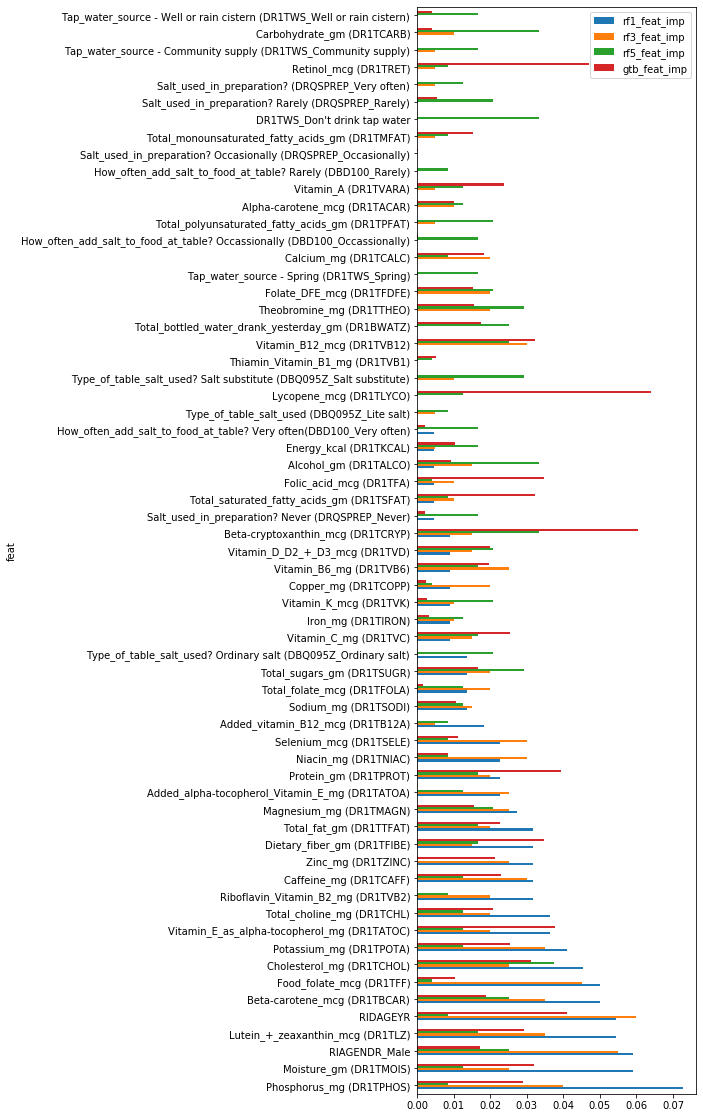

In [163]:
feature_imp_df.set_index('feat').sort_values(by='rf1_feat_imp', ascending=False, na_position='first').plot(kind='barh',figsize=(5,20))

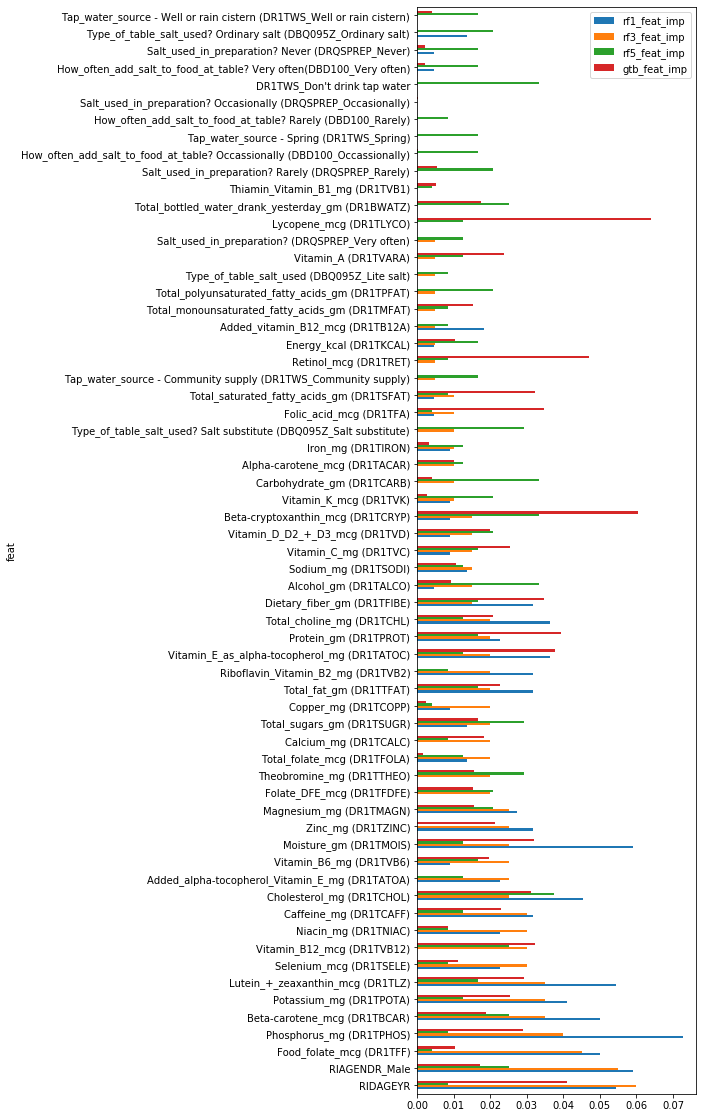

In [164]:
feature_imp_df.set_index('feat').sort_values(by='rf3_feat_imp', ascending=False, na_position='first').plot(kind='barh',figsize=(5,20))

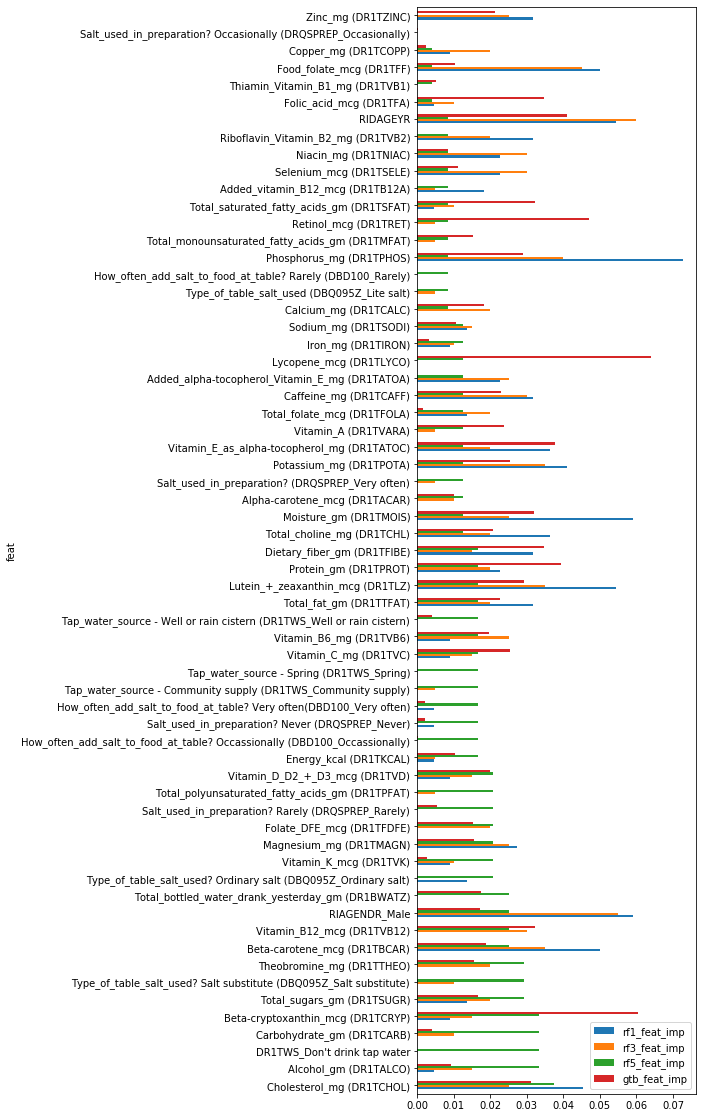

In [165]:
feature_imp_df.set_index('feat').sort_values(by='rf5_feat_imp', ascending=False, na_position='first').plot(kind='barh',figsize=(5,20))

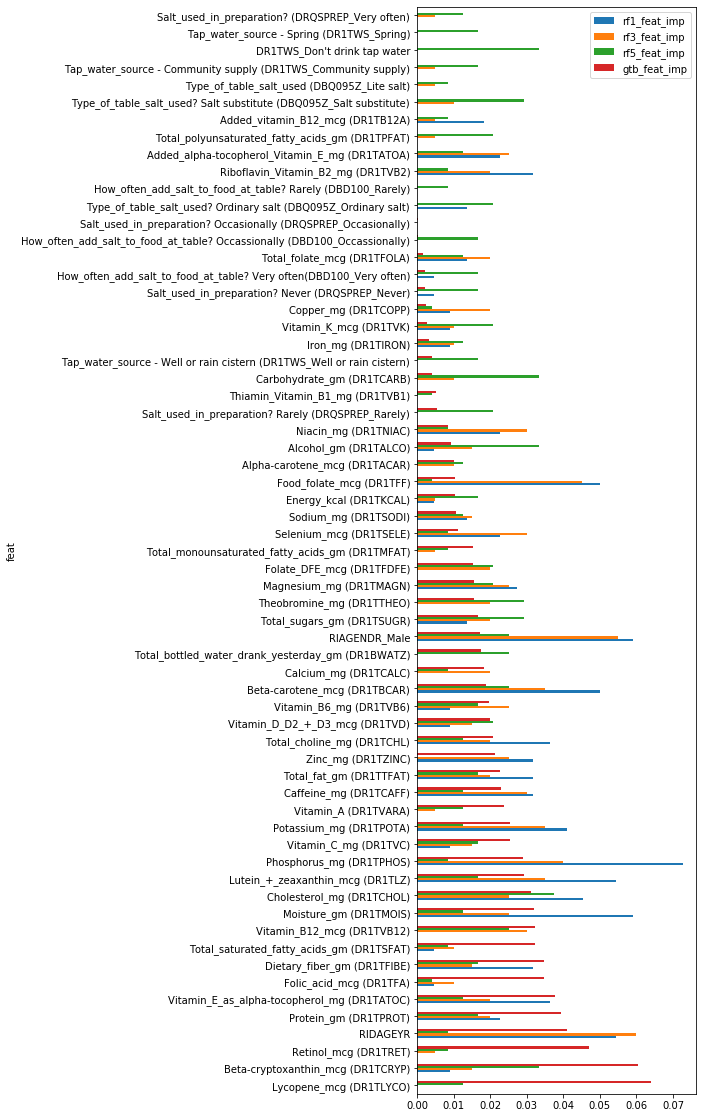

In [166]:
feature_imp_df.set_index('feat').sort_values(by='gtb_feat_imp', ascending=False, na_position='last').plot(kind='barh',figsize=(5,20))

### Voting classifer based on above models

In [167]:
#test the above models with the test data and print their recall scores
print('Accuracy scores for test data:')
print('knn: {:.3f} '.format(knn_best.score(X_test_scaled, y_test_scaled)))
print('rf3: {:.3f}'.format(rf3_best.score(X_test_scaled, y_test_scaled)))
print('rf5: {:.3f}'.format(rf5_best.score(X_test_scaled, y_test_scaled)))
print('svm: {:.3f}'.format(svm_best.score(X_test_scaled, y_test_scaled)))
print('logreg: {:.3f}'.format(logreg_cv.score(X_test_scaled, y_test_scaled)))
print('adaboost: {:.3f}'.format(ada_cv.score(X_test_scaled, y_test_scaled)))
print('grad tree boost: {:.3f}'.format(gtb_cv.score(X_test_scaled, y_test_scaled)))

Accuracy scores for test data:
knn: 0.552 
rf3: 0.603
rf5: 0.552
svm: 0.633
logreg: 0.567
adaboost: 0.701
grad tree boost: 0.884


In [168]:
print('Recall for test data:')
print('knn: {:.3f} '.format(recall_score(y_test_scaled, y_pred_knn)))
print('rf3: {:.3f}'.format(recall_score(y_test_scaled, y_pred3)))
print('rf5: {:.3f}'.format(recall_score(y_test_scaled, y_pred5)))
print('svm: {:.3f}'.format(recall_score(y_test_scaled, y_pred_svm)))
print('logreg: {:.3f}'.format(recall_score(y_test_scaled, y_pred_lr)))
print('adaboost: {:.3f}'.format(recall_score(y_test_scaled, y_pred_ada)))
print('grad tree boost: {:.3f}'.format(recall_score(y_test_scaled, y_pred_gtb)))

Recall for test data:
knn: 0.463 
rf3: 0.707
rf5: 0.750
svm: 0.787
logreg: 0.567
adaboost: 0.701
grad tree boost: 0.884


In [181]:
#create a dictionary of best models
estimators=[('rf3',rf3_best),('svm',svm_best),('ada',ada_best)]

#create the voting classifier, inputting best models
ensemble = VotingClassifier(estimators, voting='soft')

In [182]:
#fit model to training data
ensemble.fit(X_train_scaled, y_train_scaled)

# Print the scores for training set
print("Training accuracy: {:.3f}".format(ensemble.score(X_train_scaled, y_train_scaled)))
y_pred_ensemble_train = ensemble.predict(X_train_scaled)
print("Training recall: {:.3f}".format(recall_score(y_train_scaled, y_pred_ensemble_train)))

Training accuracy: 0.678
Training recall: 0.620


In [183]:
# Predict test data
y_pred_ensemble_test = ensemble.predict(X_test_scaled)

# Prediction report for test data
print_ensemble_pred_report(ensemble,X_test_scaled,y_test_scaled,y_pred_ensemble_test)

Predictions for test set:
Accuracy: 0.663
Recall: 0.677
              precision    recall  f1-score   support

       False       0.74      0.65      0.69       231
        True       0.58      0.68      0.63       164

    accuracy                           0.66       395
   macro avg       0.66      0.67      0.66       395
weighted avg       0.67      0.66      0.67       395

Confusion matrix:
[[151  80]
 [ 53 111]]


Overall, random forest (RF3), support vector machine, and AdaBoost perform best and produce similar recall scores of 0.7 or above for the True class and 0.5 or above for the False class. Gradient tree boosting method gives the highest recall for the True class (high fasting blood glucose) in the test set. However, the recall for the False class (normal fasting blood glucose) is also the lowest (0.09), reflecting the model is indiscriminative in classify most of the test set as the True class. 

# Deep learning with Keras

In [184]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
import tensorflow as tf

In [185]:
#Prepare inputs
target = y_train_scaled
predictors = X_train_scaled.to_numpy()
n_cols = predictors.shape[1]
pred_data = X_test_scaled.to_numpy()
pred_target=y_test_scaled

In [186]:
#Define fit parameters:
nepochs = 50
nbatch = 32
val_split = 0.3

In [187]:
# Set up the model
model = Sequential()

# Add the first layer
model.add(Dense(n_cols,activation='relu',input_shape=(n_cols,)))

# Add the output layer
model.add(Dense(1,activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=[tf.keras.metrics.Recall()])

# Fit the model
modelhist1 = model.fit(predictors,target,epochs=nepochs, batch_size=nbatch,validation_split=val_split)

Epoch 1/50
35/35 [==============================] - 0s 7ms/step - loss: 0.6879 - recall: 0.1681 - val_loss: 0.6789 - val_recall: 0.0203
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6641 - recall: 0.0895 - val_loss: 0.6649 - val_recall: 0.1929
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6488 - recall: 0.1856 - val_loss: 0.6565 - val_recall: 0.4061
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6354 - recall: 0.3755 - val_loss: 0.6486 - val_recall: 0.2995
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6222 - recall: 0.3908 - val_loss: 0.6449 - val_recall: 0.3249
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6144 - recall: 0.4170 - val_loss: 0.6419 - val_recall: 0.3959
Epoch 7/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6085 - recall: 0.4148 - val_loss: 0.6420 - val_recall: 0.3706
Epoch 8/50
35/35 [==============================

In [188]:
# Calculate predictions: predictions
pred_classes1 = model.predict_classes(pred_data)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [189]:
for i in range(10):
    print('%s => %d (expected %d)' % (pred_data[i].tolist(), pred_classes1[i], pred_target[i]))

[0.9264705882352942, 0.1479900391319815, 0.16068209847263068, 0.11799039005087623, 0.06395187247281171, 0.10934579439252334, 0.19786264012046176, 0.22229498607596546, 0.1614901228385956, 0.11902999019835982, 0.07291112293773283, 0.10948258902223097, 0.0, 0.14698162729658792, 0.0763832027137677, 0.0, 0.006069687119057293, 0.00029708853238265005, 0.18075535612159607, 0.005378712354809543, 0.084003405543468, 0.16350654502181672, 0.1063292865911881, 0.06902761104441776, 0.09362023405058513, 0.03293536434746809, 0.10572687224669604, 0.0700827205882353, 0.11431210669129958, 0.06306161745827984, 0.0, 0.038782379628274556, 0.13141025641025642, 0.01281854859302385, 0.24160631994733378, 0.2048938679245283, 0.18661971830985916, 0.061312389156321256, 0.09192939495969799, 0.09213746143206725, 0.17834024292675832, 0.2967475252909823, 0.07217435377597567, 0.022058823529411766, 0.0030248033877797948, 0.0, 0.11513727068419492, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0

In [190]:
print_nn_pred_report(pred_target, pred_classes1)

Predictions for test set:
              precision    recall  f1-score   support

       False       0.72      0.64      0.68       231
        True       0.56      0.66      0.61       164

    accuracy                           0.65       395
   macro avg       0.64      0.65      0.64       395
weighted avg       0.66      0.65      0.65       395

Confusion matrix:
[[147  84]
 [ 56 108]]


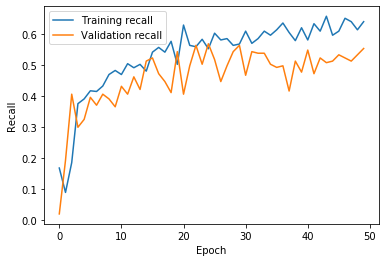

In [191]:
# Visualize model history
plt.plot(modelhist1.history['recall'], label='Training recall')
plt.plot(modelhist1.history['val_recall'], label='Validation recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

### Reduce number of neurons of the initial layer by 50%

In [192]:
# Set up the model
model2 = Sequential()

#define number of neurons in the initial layer:
n_layer1_neurons=n_cols/2

# Add the first layer
model2.add(Dense(n_layer1_neurons,activation='relu',input_shape=(n_cols,)))

# Add the output layer
model2.add(Dense(1,activation='sigmoid'))

# Compile the model
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=[tf.keras.metrics.Recall()])

# Fit the model
modelhist2 = model2.fit(predictors,target,epochs=nepochs, batch_size=nbatch,validation_split=val_split)

Epoch 1/50
35/35 [==============================] - 0s 6ms/step - loss: 0.6809 - recall_1: 0.2576 - val_loss: 0.6704 - val_recall_1: 0.0609
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6641 - recall_1: 0.1135 - val_loss: 0.6615 - val_recall_1: 0.1472
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6521 - recall_1: 0.1572 - val_loss: 0.6567 - val_recall_1: 0.2030
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6434 - recall_1: 0.2314 - val_loss: 0.6518 - val_recall_1: 0.2538
Epoch 5/50
35/35 [==============================] - 0s 3ms/step - loss: 0.6346 - recall_1: 0.3253 - val_loss: 0.6490 - val_recall_1: 0.2690
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6304 - recall_1: 0.3144 - val_loss: 0.6470 - val_recall_1: 0.2843
Epoch 7/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6210 - recall_1: 0.3581 - val_loss: 0.6443 - val_recall_1: 0.3553
Epoch 8/50
35/35 [==

In [193]:
# Calculate predictions: predictions
pred_classes2 = model2.predict_classes(pred_data)

In [194]:
print_nn_pred_report(pred_target, pred_classes2)

Predictions for test set:
              precision    recall  f1-score   support

       False       0.69      0.75      0.72       231
        True       0.60      0.51      0.55       164

    accuracy                           0.65       395
   macro avg       0.64      0.63      0.63       395
weighted avg       0.65      0.65      0.65       395

Confusion matrix:
[[174  57]
 [ 80  84]]


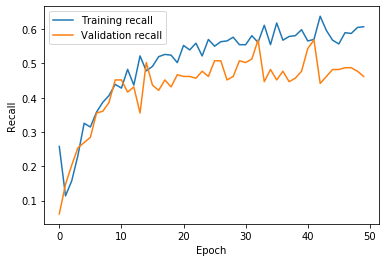

In [195]:
# Visualize model history
plt.plot(modelhist2.history['recall_1'], label='Training recall')
plt.plot(modelhist2.history['val_recall_1'], label='Validation recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

### Add additional hidden layers

In [196]:
# Set up the model
model3 = Sequential()

#define number of neurons in the initial layer:
n_layer1_neurons=n_cols

# Add the first layer
model3.add(Dense(n_layer1_neurons,activation='relu',input_shape=(n_cols,)))

# Add hidden layers
model3.add(Dense(100, activation='relu'))
model3.add(Dense(100, activation='relu'))

# Add the output layer
model3.add(Dense(1,activation='sigmoid'))

# Compile the model
model3.compile(optimizer='adam',loss='binary_crossentropy',metrics=[tf.keras.metrics.Recall()])

# Fit the model
modelhist3 = model3.fit(predictors,target,epochs=nepochs, batch_size=nbatch,validation_split=val_split)

Epoch 1/50
35/35 [==============================] - 0s 6ms/step - loss: 0.6680 - recall_2: 0.0917 - val_loss: 0.6547 - val_recall_2: 0.1878
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6304 - recall_2: 0.3210 - val_loss: 0.6383 - val_recall_2: 0.4924
Epoch 3/50
35/35 [==============================] - 0s 3ms/step - loss: 0.6093 - recall_2: 0.5066 - val_loss: 0.6376 - val_recall_2: 0.4112
Epoch 4/50
35/35 [==============================] - 0s 3ms/step - loss: 0.5920 - recall_2: 0.5349 - val_loss: 0.6418 - val_recall_2: 0.6091
Epoch 5/50
35/35 [==============================] - 0s 3ms/step - loss: 0.5830 - recall_2: 0.5568 - val_loss: 0.6375 - val_recall_2: 0.5381
Epoch 6/50
35/35 [==============================] - 0s 3ms/step - loss: 0.5693 - recall_2: 0.5677 - val_loss: 0.6539 - val_recall_2: 0.6497
Epoch 7/50
35/35 [==============================] - 0s 2ms/step - loss: 0.5639 - recall_2: 0.5699 - val_loss: 0.6396 - val_recall_2: 0.5431
Epoch 8/50
35/35 [==

In [197]:
# Calculate predictions: predictions
pred_classes3 = model3.predict_classes(pred_data)

In [198]:
print_nn_pred_report(pred_target, pred_classes3)

Predictions for test set:
              precision    recall  f1-score   support

       False       0.63      0.63      0.63       231
        True       0.48      0.49      0.48       164

    accuracy                           0.57       395
   macro avg       0.56      0.56      0.56       395
weighted avg       0.57      0.57      0.57       395

Confusion matrix:
[[145  86]
 [ 84  80]]


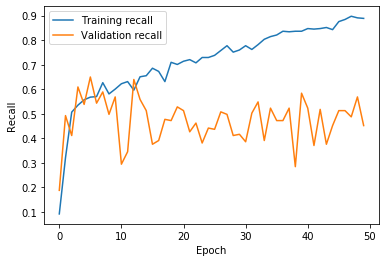

In [199]:
# Visualize model history
plt.plot(modelhist3.history['recall_2'], label='Training recall')
plt.plot(modelhist3.history['val_recall_2'], label='Validation recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

### And more layers

In [200]:
# Set up the model
model4 = Sequential()

#define number of neurons in the initial layer:
n_layer1_neurons=n_cols

# Add the first layer
model4.add(Dense(n_layer1_neurons,activation='relu',input_shape=(n_cols,)))

# Add hidden layers
model4.add(Dense(100, activation='relu'))
model4.add(Dense(100, activation='relu'))
model4.add(Dense(100, activation='relu'))
model4.add(Dense(100, activation='relu'))

# Add the output layer
model4.add(Dense(1,activation='sigmoid'))

# Compile the model
model4.compile(optimizer='adam',loss='binary_crossentropy',metrics=[tf.keras.metrics.Recall()])

# Fit the model
modelhist4 = model4.fit(predictors,target,epochs=nepochs, batch_size=nbatch,validation_split=val_split)

Epoch 1/50
35/35 [==============================] - 0s 7ms/step - loss: 0.6679 - recall_3: 0.0371 - val_loss: 0.6578 - val_recall_3: 0.0406
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6315 - recall_3: 0.3996 - val_loss: 0.6266 - val_recall_3: 0.5279
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6076 - recall_3: 0.5590 - val_loss: 0.6579 - val_recall_3: 0.7107
Epoch 4/50
35/35 [==============================] - 0s 3ms/step - loss: 0.5844 - recall_3: 0.5808 - val_loss: 0.6370 - val_recall_3: 0.4619
Epoch 5/50
35/35 [==============================] - 0s 3ms/step - loss: 0.5767 - recall_3: 0.6507 - val_loss: 0.6602 - val_recall_3: 0.3858
Epoch 6/50
35/35 [==============================] - 0s 3ms/step - loss: 0.5717 - recall_3: 0.6179 - val_loss: 0.6510 - val_recall_3: 0.6701
Epoch 7/50
35/35 [==============================] - 0s 3ms/step - loss: 0.5571 - recall_3: 0.6114 - val_loss: 0.6722 - val_recall_3: 0.5330
Epoch 8/50
35/35 [==

In [201]:
# Calculate predictions: predictions
pred_classes4 = model4.predict_classes(pred_data)

In [202]:
print_nn_pred_report(pred_target, pred_classes4)

Predictions for test set:
              precision    recall  f1-score   support

       False       0.62      0.62      0.62       231
        True       0.46      0.45      0.46       164

    accuracy                           0.55       395
   macro avg       0.54      0.54      0.54       395
weighted avg       0.55      0.55      0.55       395

Confusion matrix:
[[144  87]
 [ 90  74]]


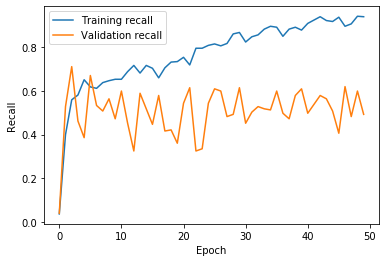

In [203]:
# Visualize model history
plt.plot(modelhist4.history['recall_3'], label='Training recall')
plt.plot(modelhist4.history['val_recall_3'], label='Validation recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

### And how about more training (epochs = 100)

In [204]:
# Set up the model
model5 = Sequential()

#define number of neurons in the initial layer:
n_layer1_neurons=n_cols

# Add the first layer
model5.add(Dense(n_cols,activation='relu',input_shape=(n_cols,)))
model5.add(Dense(100, activation='relu'))
model5.add(Dense(100, activation='relu'))
model5.add(Dense(100, activation='relu'))
model5.add(Dense(100, activation='relu'))

# Add the output layer
model5.add(Dense(1,activation='sigmoid'))

# Compile the model
model5.compile(optimizer='adam',loss='binary_crossentropy',metrics=[tf.keras.metrics.Recall()])

# Fit the model
modelhist5 = model5.fit(predictors,target,epochs=nepochs*2, batch_size=nbatch,validation_split=val_split)

Epoch 1/100
35/35 [==============================] - 0s 7ms/step - loss: 0.6783 - recall_4: 0.0000e+00 - val_loss: 0.6647 - val_recall_4: 0.0000e+00
Epoch 2/100
35/35 [==============================] - 0s 2ms/step - loss: 0.6331 - recall_4: 0.2795 - val_loss: 0.6451 - val_recall_4: 0.3604
Epoch 3/100
35/35 [==============================] - 0s 2ms/step - loss: 0.6035 - recall_4: 0.5633 - val_loss: 0.6384 - val_recall_4: 0.4264
Epoch 4/100
35/35 [==============================] - 0s 2ms/step - loss: 0.5782 - recall_4: 0.6288 - val_loss: 0.6522 - val_recall_4: 0.4619
Epoch 5/100
35/35 [==============================] - 0s 2ms/step - loss: 0.5744 - recall_4: 0.6004 - val_loss: 0.6481 - val_recall_4: 0.6650
Epoch 6/100
35/35 [==============================] - 0s 2ms/step - loss: 0.5651 - recall_4: 0.6310 - val_loss: 0.6560 - val_recall_4: 0.5127
Epoch 7/100
35/35 [==============================] - 0s 2ms/step - loss: 0.5491 - recall_4: 0.6332 - val_loss: 0.6524 - val_recall_4: 0.5635
Epoch

Epoch 59/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1245 - recall_4: 0.9410 - val_loss: 2.6992 - val_recall_4: 0.4924
Epoch 60/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1362 - recall_4: 0.9345 - val_loss: 2.5386 - val_recall_4: 0.5178
Epoch 61/100
35/35 [==============================] - 0s 2ms/step - loss: 0.0925 - recall_4: 0.9738 - val_loss: 2.7574 - val_recall_4: 0.4061
Epoch 62/100
35/35 [==============================] - 0s 2ms/step - loss: 0.0711 - recall_4: 0.9585 - val_loss: 2.7882 - val_recall_4: 0.5076
Epoch 63/100
35/35 [==============================] - 0s 2ms/step - loss: 0.0408 - recall_4: 0.9847 - val_loss: 3.0894 - val_recall_4: 0.5330
Epoch 64/100
35/35 [==============================] - 0s 2ms/step - loss: 0.0289 - recall_4: 0.9934 - val_loss: 3.2952 - val_recall_4: 0.4721
Epoch 65/100
35/35 [==============================] - 0s 2ms/step - loss: 0.0347 - recall_4: 0.9869 - val_loss: 3.3815 - val_recall_4: 0.4975
Epoch 

In [205]:
# Calculate predictions: predictions
pred_classes5 = model5.predict_classes(pred_data)

In [206]:
print_nn_pred_report(pred_target, pred_classes5)

Predictions for test set:
              precision    recall  f1-score   support

       False       0.67      0.62      0.64       231
        True       0.51      0.56      0.54       164

    accuracy                           0.60       395
   macro avg       0.59      0.59      0.59       395
weighted avg       0.60      0.60      0.60       395

Confusion matrix:
[[144  87]
 [ 72  92]]


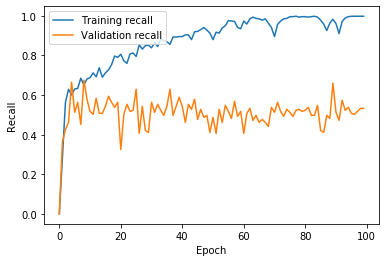

In [207]:
# Visualize model history
plt.plot(modelhist5.history['recall_4'], label='Training recall')
plt.plot(modelhist5.history['val_recall_4'], label='Validation recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

In [208]:
model5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 63)                4032      
_________________________________________________________________
dense_15 (Dense)             (None, 100)               6400      
_________________________________________________________________
dense_16 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_17 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_18 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 101       
Total params: 40,833
Trainable params: 40,833
Non-trainable params: 0
__________________________________________________

Neural network models were also developed using Keras and TensorFlow. Overall, relative to the classification models above, the neural network models did not provide better performance, at least for the True class. The recall scores for the True class in the testing set range from 0.45 to 0.66, while the recall scores for the False class are >0.6.